In [10]:
import networkx as nx
import numpy as np

def assortativity_increase(G, target_assortativity):
    """
    对给定的网络 G 进行断边重连，直到网络的度相关性达到目标值 target_assortativity。
    """
    current_assortativity = nx.degree_assortativity_coefficient(G)
    while current_assortativity < target_assortativity:
        # 随机选择两条边
        edges = list(G.edges())
        edge1, edge2 = np.random.choice(np.arange(len(edges)), 2, replace=False)
        edge1, edge2 = edges[edge1], edges[edge2]
        
        # 获取边的节点
        a, b = edge1
        c, d = edge2
        
        # 检查是否会形成自环或重复的边
        if a == c or a == d or b == c or b == d or G.has_edge(a, d) or G.has_edge(b, c):
            continue
        
        # 执行断边重连
        G.remove_edge(a, b)
        G.remove_edge(c, d)
        G.add_edge(a, d)
        G.add_edge(b, c)
        
        new_assortativity = nx.degree_assortativity_coefficient(G)
        
        # 如果度相关性没有增加，则撤销更改
        if new_assortativity <= current_assortativity:
            G.remove_edge(a, d)
            G.remove_edge(b, c)
            G.add_edge(a, b)
            G.add_edge(c, d)
        else:
            current_assortativity = new_assortativity
    
    # 检查是否达到目标度相关性
    reached_target = current_assortativity >= target_assortativity
    return reached_target, current_assortativity

In [11]:
import networkx as nx
import numpy as np

def assortativity_decrease(G, target_assortativity):
    """
    对给定的网络 G 进行断边重连，直到网络的度相关性达到目标值 target_assortativity。
    """
    current_assortativity = nx.degree_assortativity_coefficient(G)
    while current_assortativity > target_assortativity:
        # 随机选择两条边
        edges = list(G.edges())
        edge1, edge2 = np.random.choice(np.arange(len(edges)), 2, replace=False)
        edge1, edge2 = edges[edge1], edges[edge2]
        
        # 获取边的节点
        a, b = edge1
        c, d = edge2
        
        # 检查是否会形成自环或重复的边
        if a == c or a == d or b == c or b == d or G.has_edge(a, d) or G.has_edge(b, c):
            continue
        
        # 执行断边重连
        G.remove_edge(a, b)
        G.remove_edge(c, d)
        G.add_edge(a, d)
        G.add_edge(b, c)
        
        new_assortativity = nx.degree_assortativity_coefficient(G)
        
        # 如果度相关性没有增加，则撤销更改
        if new_assortativity >= current_assortativity:
            G.remove_edge(a, d)
            G.remove_edge(b, c)
            G.add_edge(a, b)
            G.add_edge(c, d)
        else:
            current_assortativity = new_assortativity
    
    # 检查是否达到目标度相关性
    reached_target = current_assortativity <= target_assortativity
    return reached_target, current_assortativity

初始度相关性: 0.00820705116555584
达到阈值 0.2 的度相关性: 0.20005993234726155


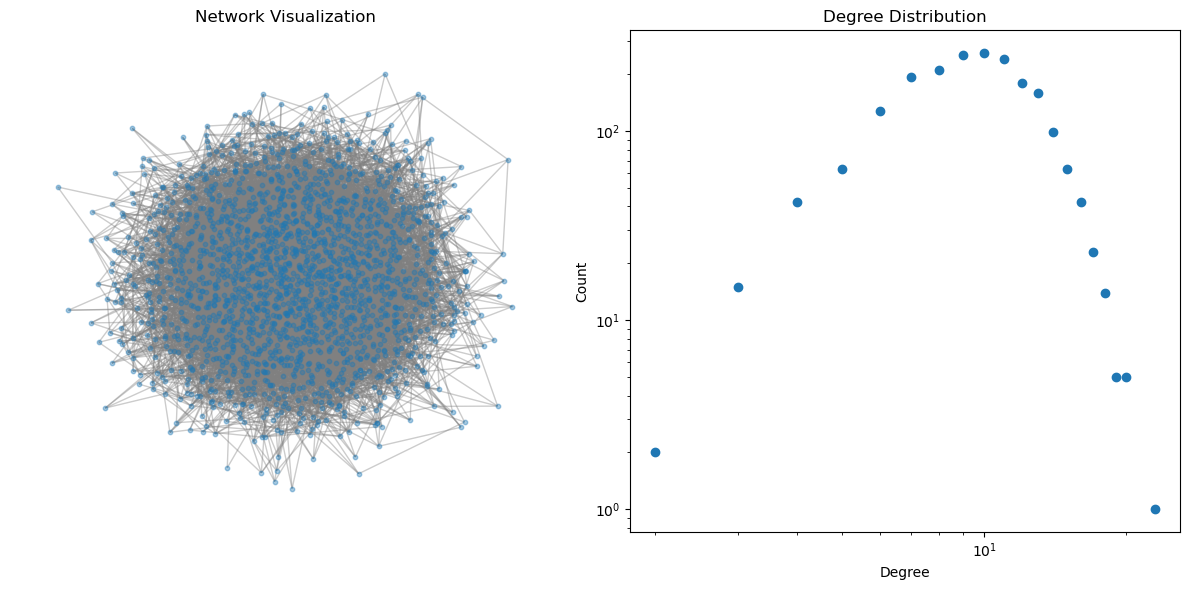

达到阈值 0.5 的度相关性: 0.5001193603186224


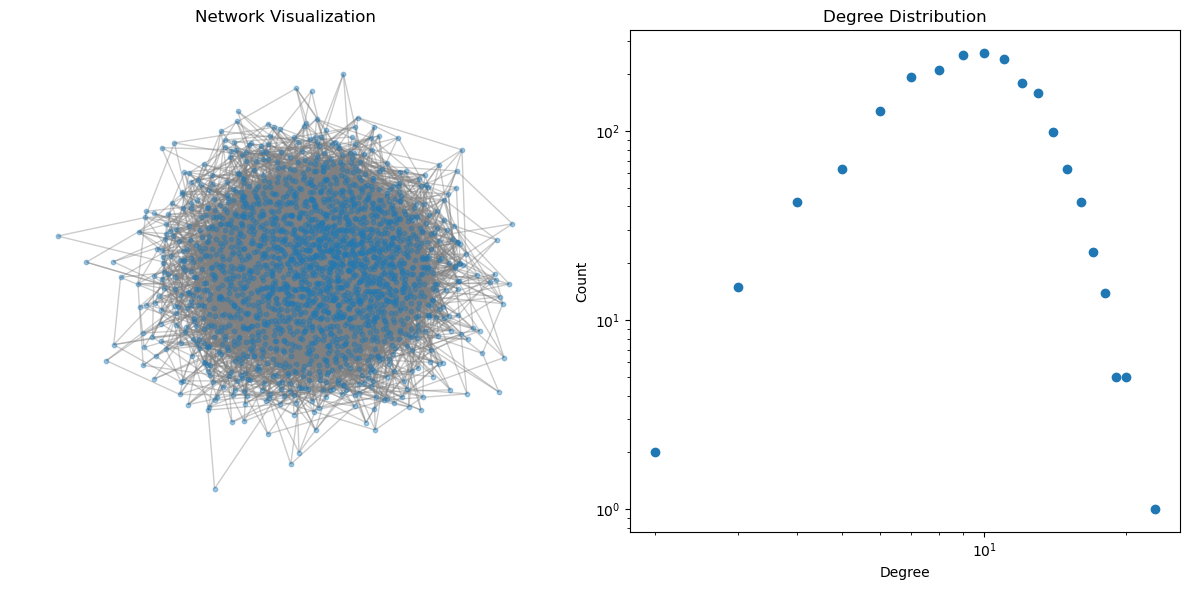

达到阈值 0.8 的度相关性: 0.8000096990480061


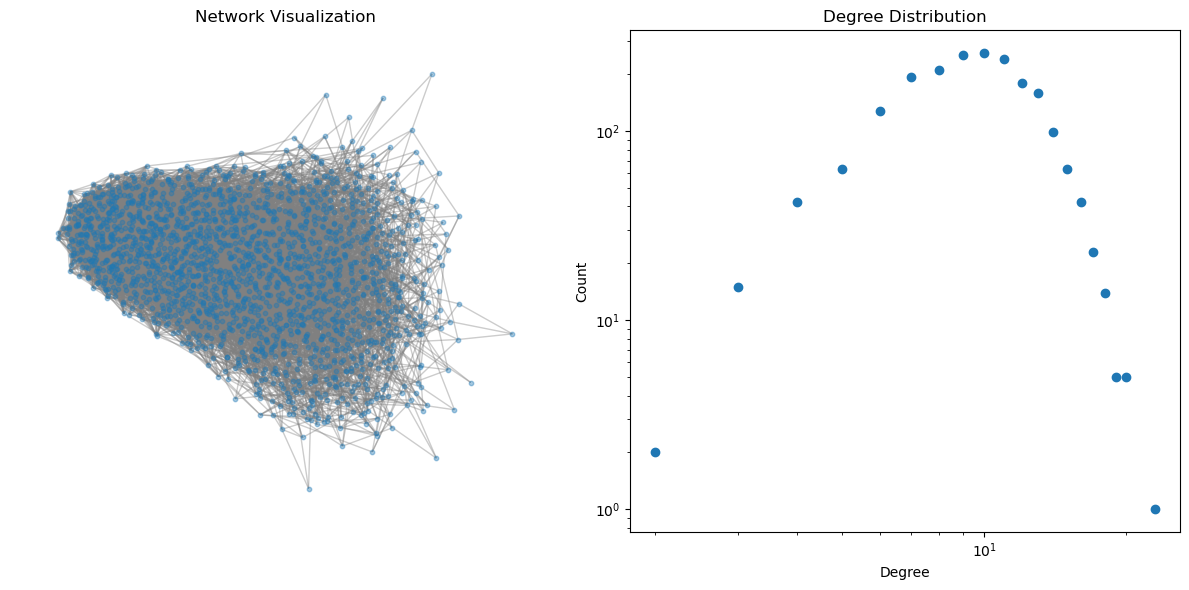

所有邻接矩阵已保存为pkl文件。


In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle

def draw_network_and_degree_distribution(G):
    """
    绘制网络图和度分布散点图。
    """
    plt.figure(figsize=(12, 6))
    
    # 绘制网络图
    plt.subplot(1, 2, 1)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_size=10, edge_color="grey", alpha=0.4, with_labels=False)
    plt.title("Network Visualization")
    
    # 绘制度分布散点图
    plt.subplot(1, 2, 2)
    degrees = dict(G.degree()).values()
    degree_counts = dict((x, list(degrees).count(x)) for x in set(degrees))
    plt.scatter(degree_counts.keys(), degree_counts.values())
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Degree")
    plt.ylabel("Count")
    plt.title("Degree Distribution")
    
    plt.tight_layout()
    plt.show()

def main():
    N = 2000  # 节点数
    p = 0.005  # 连接概率
    target_assortativities = [0.2, 0.5, 0.8]  # 目标度相关性阈值列表
    
    # 生成 ER 随机网络
    G = nx.erdos_renyi_graph(N, p)
    initial_assortativity = nx.degree_assortativity_coefficient(G)
    print(f"初始度相关性: {initial_assortativity}")
    
    networks_matrices = []  # 用于存储每个阈值下的邻接矩阵

    for target in target_assortativities:
        assortativity_increase(G, target)  # 假设这个函数已经根据要求进行了修改
        current_assortativity = nx.degree_assortativity_coefficient(G)
        if current_assortativity >= target:
            print(f"达到阈值 {target} 的度相关性: {current_assortativity}")
            draw_network_and_degree_distribution(G)
            # 转换为邻接矩阵并存储
            adj_matrix = nx.to_numpy_array(G)
            networks_matrices.append(adj_matrix)
    
    # 将邻接矩阵列表保存为pkl文件
    with open("networks_matrices.pkl", "wb") as f:
        pickle.dump(networks_matrices, f)

    print("所有邻接矩阵已保存为pkl文件。")

if __name__ == "__main__":
    main()

初始度相关性: 0.0032005729745969063
达到阈值 -0.2 的度相关性: -0.20001036584805404


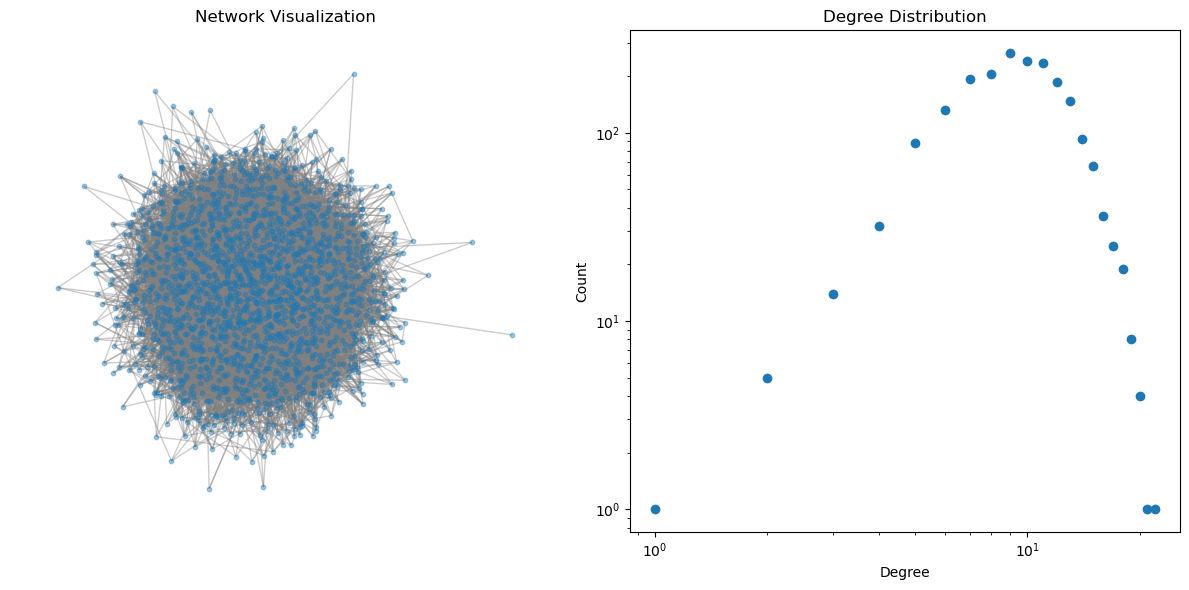

达到阈值 -0.5 的度相关性: -0.5000908833256991


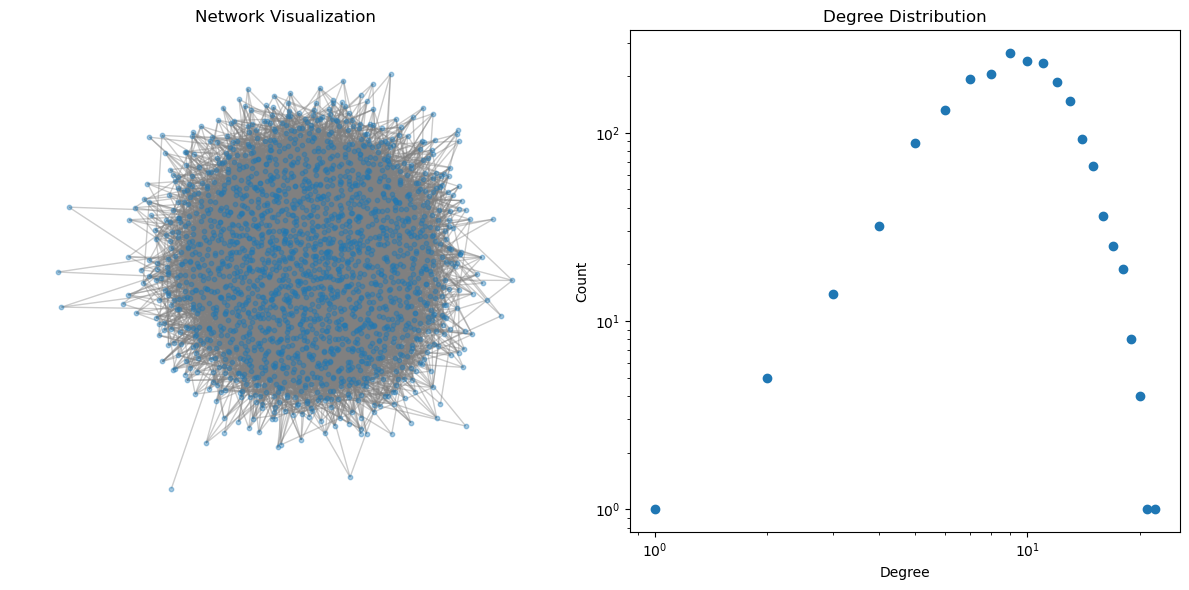

达到阈值 -0.8 的度相关性: -0.8000306312267134


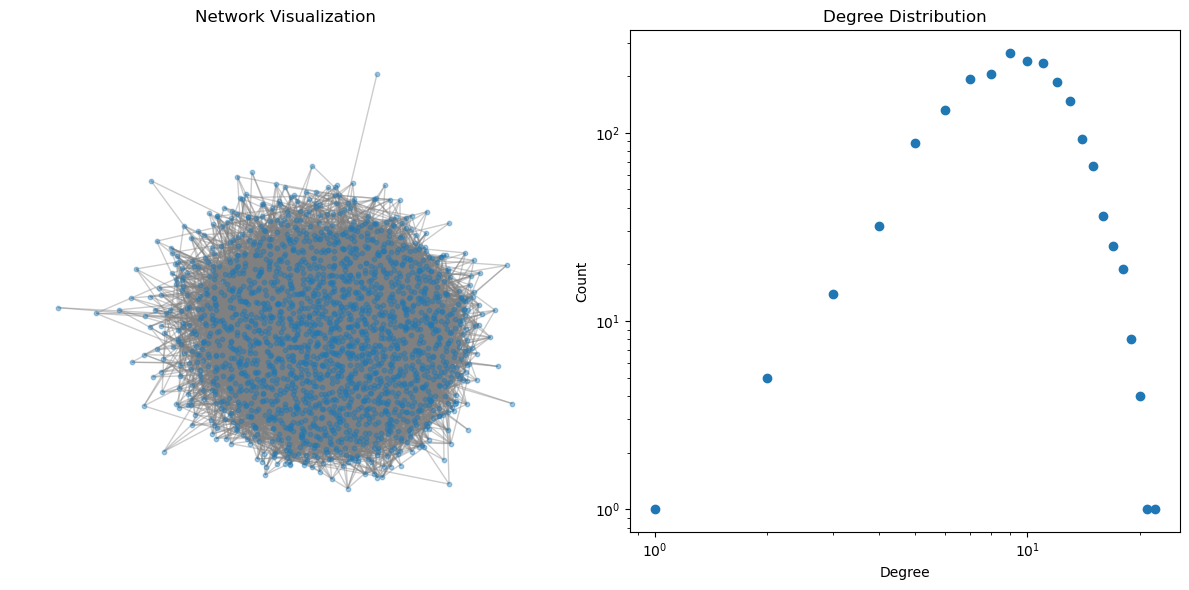

邻接矩阵已保存为pkl文件。
达到阈值 0.2 的度相关性: 0.20020759545615074


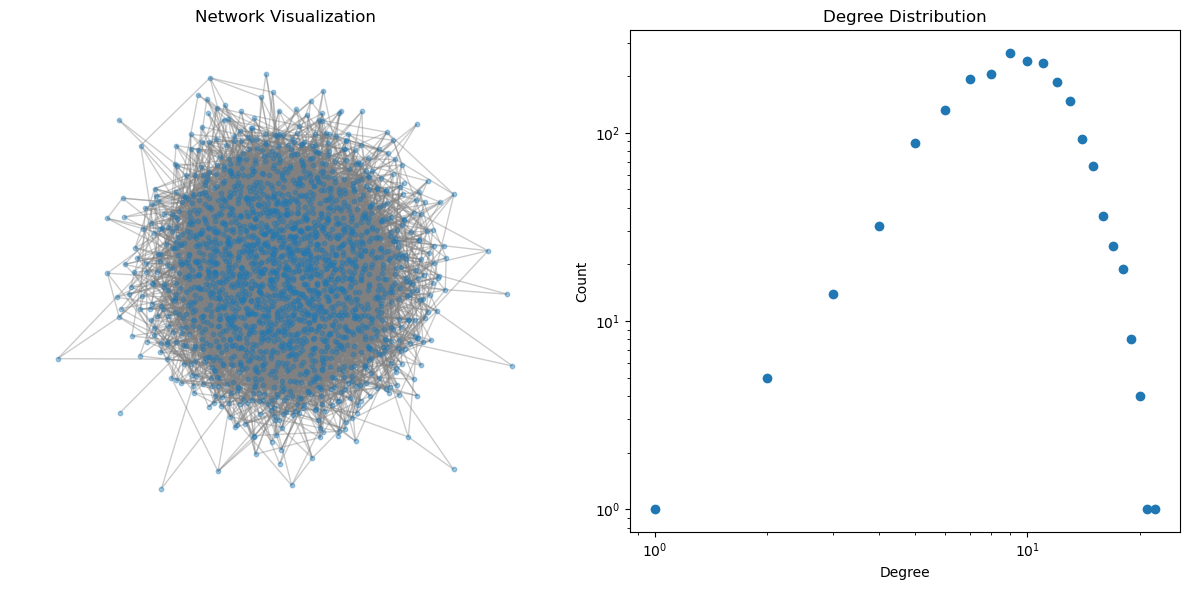

达到阈值 0.5 的度相关性: 0.5000870135386208


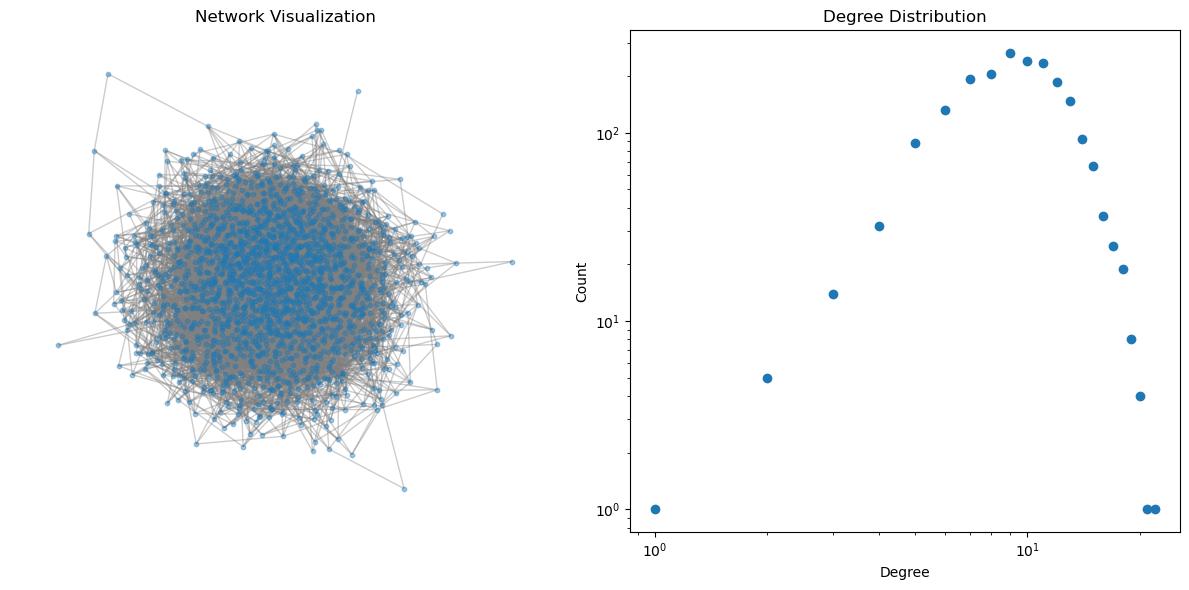

达到阈值 0.8 的度相关性: 0.8000066515001276


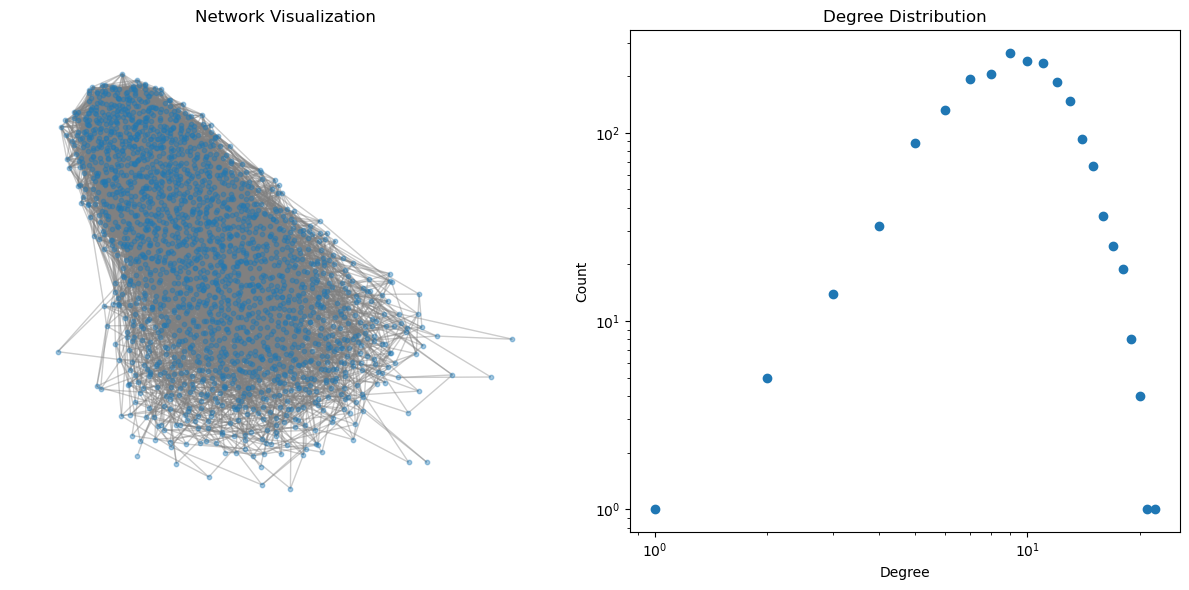

邻接矩阵已保存为pkl文件。


In [13]:
def main():
    N = 2000  # 节点数
    p = 0.005  # 连接概率
    target_assortativities_increase = [0.2, 0.5, 0.8]  # 目标度相关性阈值列表
    target_assortativities_decrease = [-0.2, -0.5, -0.8]  # 目标度相关性阈值列表
    
    # 生成 ER 随机网络
    G = nx.erdos_renyi_graph(N, p)
    initial_assortativity = nx.degree_assortativity_coefficient(G)
    print(f"初始度相关性: {initial_assortativity}")
    
    networks_matrices_in = []  # 用于存储每个阈值下的邻接矩阵
    networks_matrices_de = []  # 用于存储每个阈值下的邻接矩阵
    
    for target in target_assortativities_decrease:
        assortativity_decrease(G, target)  # 假设这个函数已经根据要求进行了修改
        current_assortativity = nx.degree_assortativity_coefficient(G)
        if current_assortativity <= target:
            print(f"达到阈值 {target} 的度相关性: {current_assortativity}")
            draw_network_and_degree_distribution(G)
            # 转换为邻接矩阵并存储
            adj_matrix = nx.to_numpy_array(G)
            networks_matrices_de.append(adj_matrix)
            
    # 将邻接矩阵列表保存为pkl文件
    with open("networks_matrices_de.pkl", "wb") as f:
        pickle.dump(networks_matrices_de, f)

    print("邻接矩阵已保存为pkl文件。")
            

    for target in target_assortativities_increase:
        assortativity_increase(G, target)  # 假设这个函数已经根据要求进行了修改
        current_assortativity = nx.degree_assortativity_coefficient(G)
        if current_assortativity >= target:
            print(f"达到阈值 {target} 的度相关性: {current_assortativity}")
            draw_network_and_degree_distribution(G)
            # 转换为邻接矩阵并存储
            adj_matrix = nx.to_numpy_array(G)
            networks_matrices_in.append(adj_matrix)
            
    # 将邻接矩阵列表保存为pkl文件
    with open("networks_matrices_in.pkl", "wb") as f:
        pickle.dump(networks_matrices_in, f)

    print("邻接矩阵已保存为pkl文件。")

if __name__ == "__main__":
    main()

In [14]:
import pickle
from scipy.io import savemat

# 加载 .pkl 文件
def load_matrices_from_pkl(file_path):
    with open(file_path, "rb") as f:
        return pickle.load(f)

# 保存为 .mat 文件
def save_matrices_as_mat(matrices, assortativity_values, prefix):
    for i, matrix in enumerate(matrices):
        filename = f"{prefix}_assortativity_{assortativity_values[i]}.mat"
        savemat(filename, {'adj_matrix': matrix})
        print(f"Saved matrix with assortativity {assortativity_values[i]} to '{filename}'.")

In [16]:
# 示例用法
networks_matrices_in = load_matrices_from_pkl("networks_matrices_in.pkl")
networks_matrices_de = load_matrices_from_pkl("networks_matrices_de.pkl")

assortativity_values_increase = [0.2, 0.5, 0.8]
assortativity_values_decrease = [-0.2, -0.5, -0.8]

save_matrices_as_mat(networks_matrices_in, assortativity_values_increase, "increased")
save_matrices_as_mat(networks_matrices_de, assortativity_values_decrease, "decreased")

Saved matrix with assortativity 0.2 to 'increased_assortativity_0.2.mat'.
Saved matrix with assortativity 0.5 to 'increased_assortativity_0.5.mat'.
Saved matrix with assortativity 0.8 to 'increased_assortativity_0.8.mat'.
Saved matrix with assortativity -0.2 to 'decreased_assortativity_-0.2.mat'.
Saved matrix with assortativity -0.5 to 'decreased_assortativity_-0.5.mat'.
Saved matrix with assortativity -0.8 to 'decreased_assortativity_-0.8.mat'.


In [17]:
import scipy.io
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def mat_to_networkx(adj_matrix):
    """将邻接矩阵转换为NetworkX图对象。"""
    G = nx.from_numpy_array(adj_matrix)
    return G

def draw_scatter_plots_for_network(G, title, x_range=None, y_range=None):
    # 计算节点的度和聚类系数
    degrees = dict(G.degree())
    clustering_coefficients = nx.clustering(G)
    
    # 准备绘图数据
    degree_values = list(degrees.values())
    clustering_values = list(clustering_coefficients.values())
    
    # 绘制度与聚类系数的散点图
    plt.figure(figsize=(14, 5))
    plt.subplot(121)
    plt.scatter(degree_values, clustering_values, alpha=0.6)
    plt.title(f"{title}\nClustering Coefficient vs Degree")
    plt.xlabel("Degree")
    plt.ylabel("Clustering Coefficient")
    
    # 应用坐标轴范围
    if x_range is not None:
        plt.xlim(x_range)
    if y_range is not None:
        plt.ylim(y_range)
    
    # 如果还想绘制度中心性与度的关系
    degree_centrality = nx.degree_centrality(G)
    centrality_values = list(degree_centrality.values())
    
    plt.subplot(122)
    plt.scatter(degree_values, centrality_values, alpha=0.6, color='red')
    plt.title(f"{title}\nDegree Centrality vs Degree")
    plt.xlabel("Degree")
    plt.ylabel("Degree Centrality")

    
    plt.tight_layout()
    plt.show()

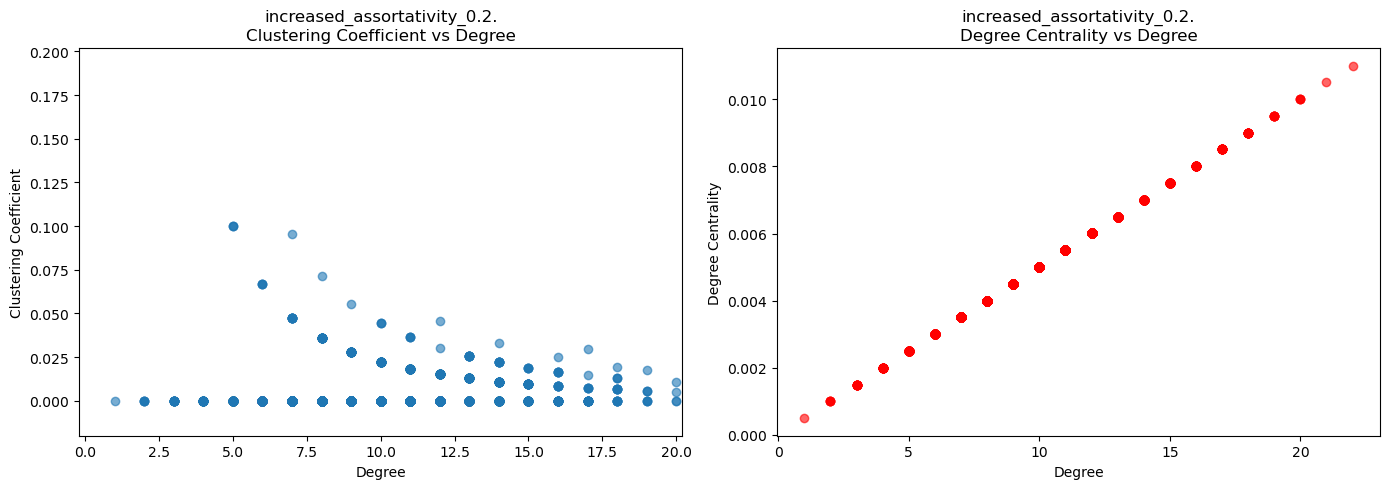

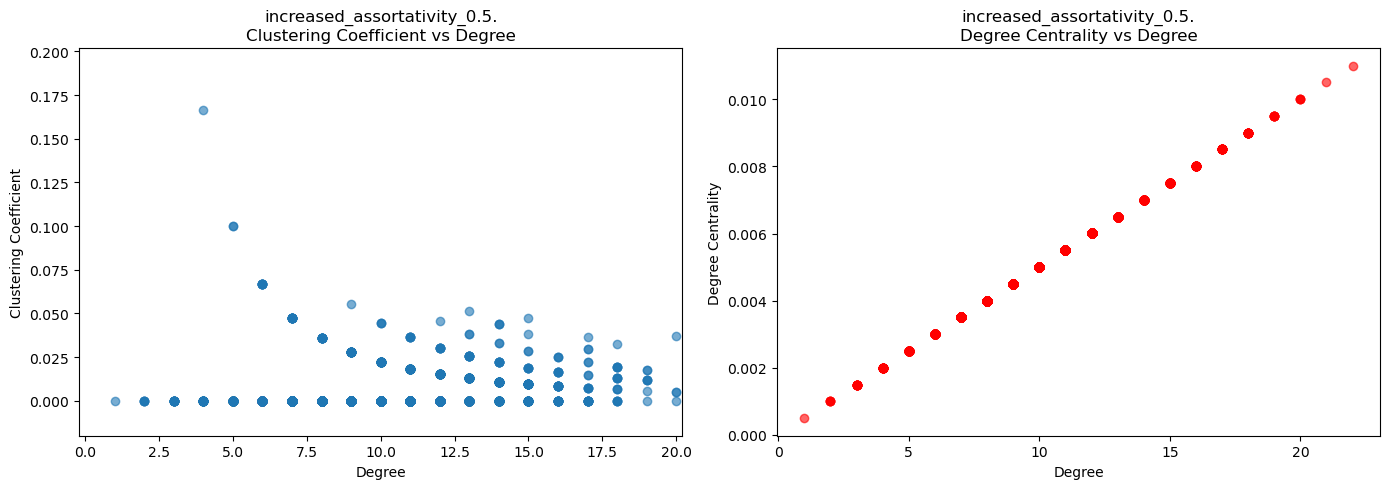

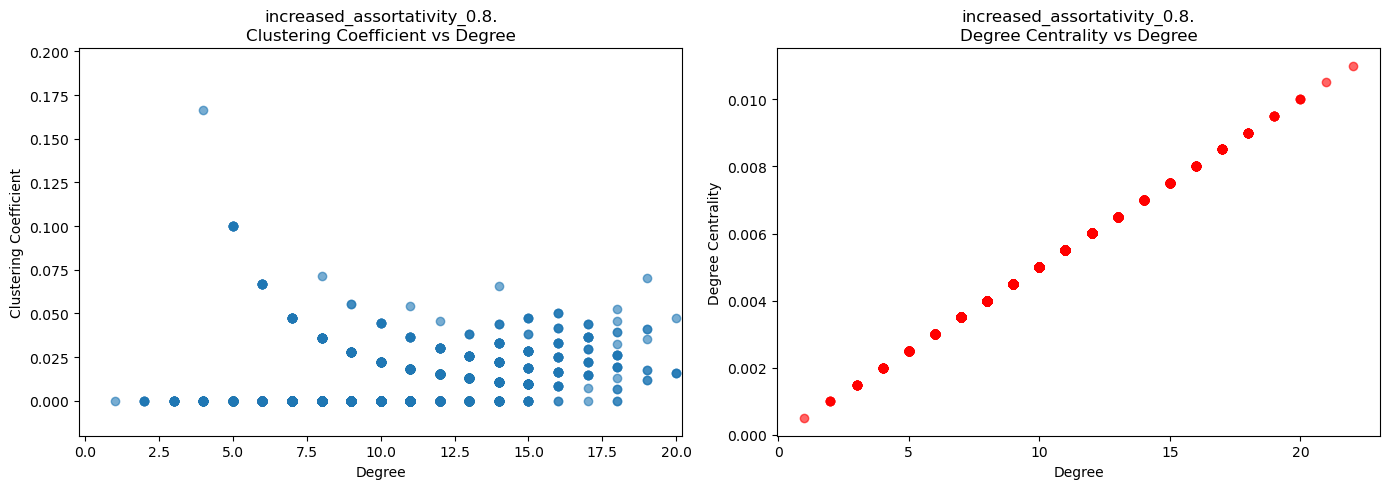

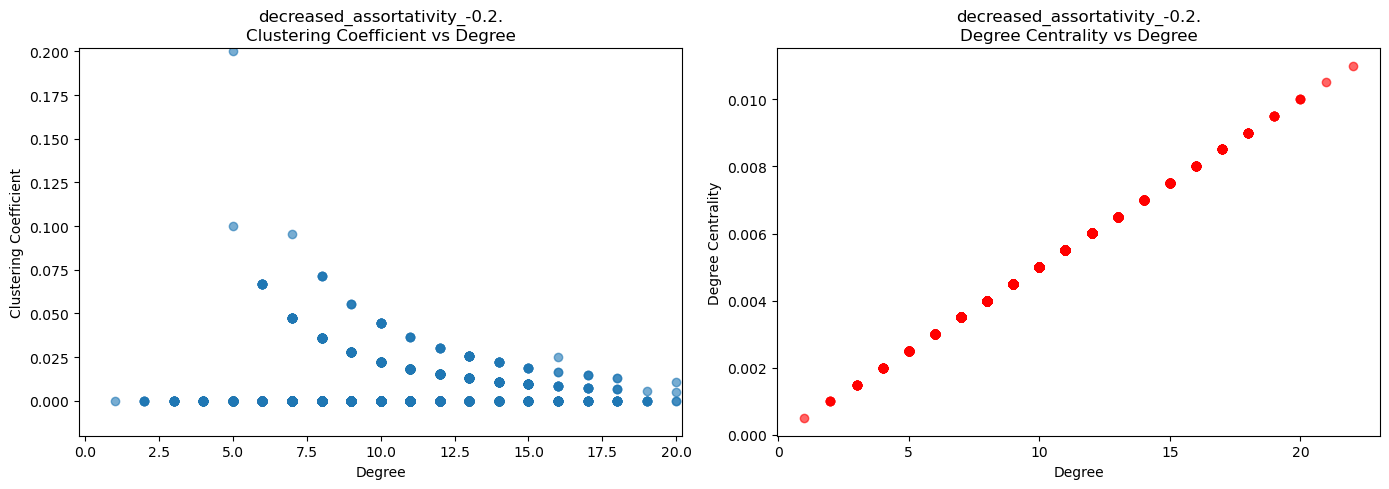

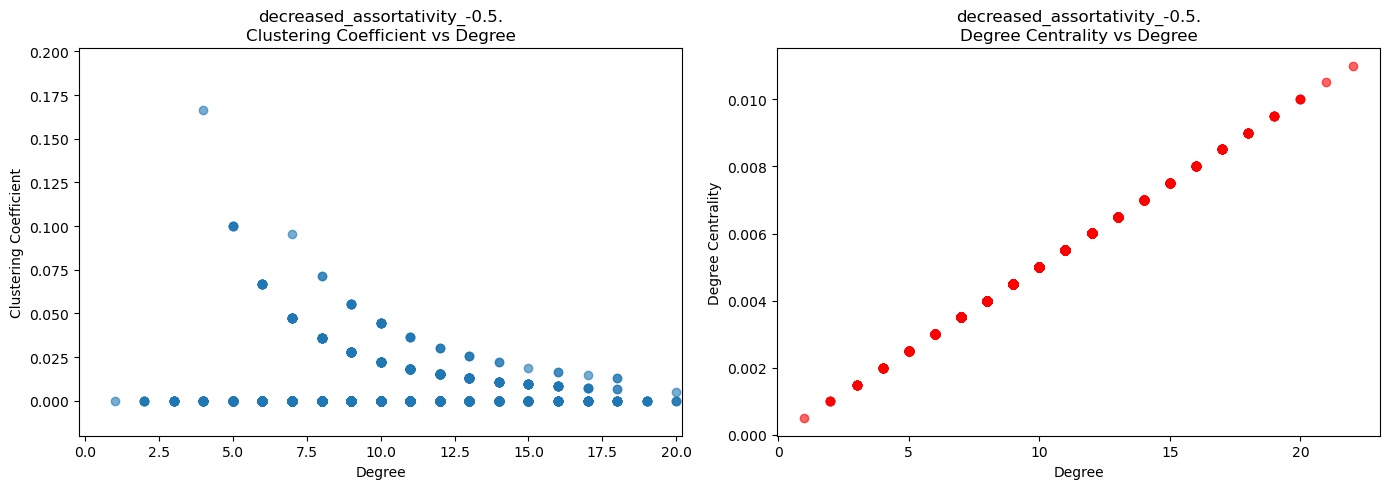

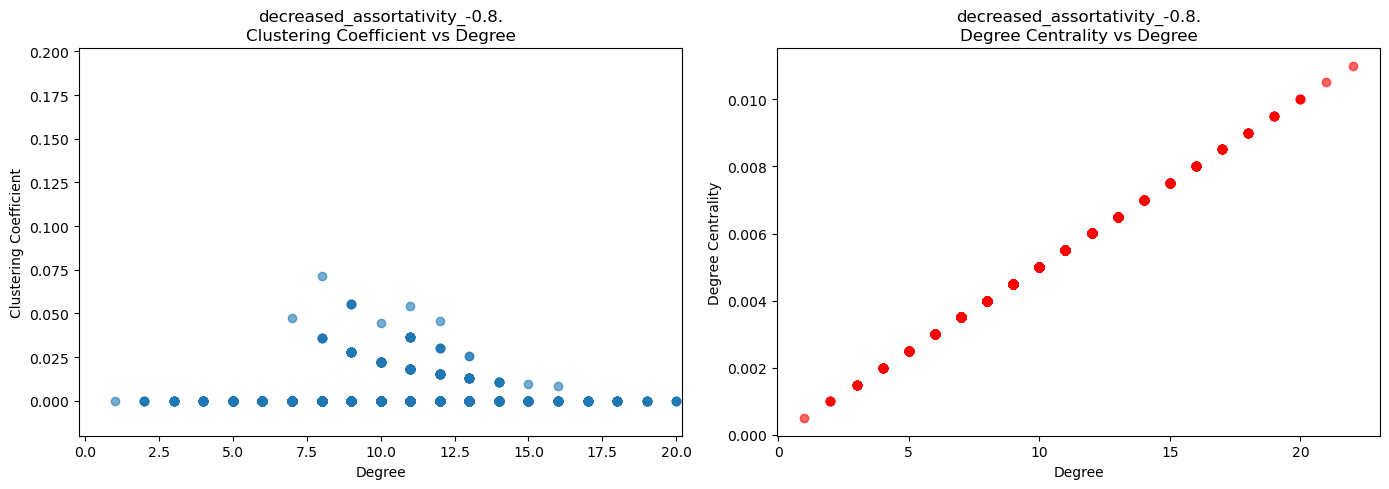

In [18]:
import re

# 指定.mat文件的路径
filenames = [
    "increased_assortativity_0.2.mat",
    "increased_assortativity_0.5.mat",
    "increased_assortativity_0.8.mat",
    "decreased_assortativity_-0.2.mat",
    "decreased_assortativity_-0.5.mat",
    "decreased_assortativity_-0.8.mat"
]

# 读取每个.mat文件，转换为NetworkX图，并进行分析
for filename in filenames:
    mat = scipy.io.loadmat(filename)
    adj_matrix = mat['adj_matrix']
    G = mat_to_networkx(adj_matrix)
    # 使用正则表达式提取正确的标题
    match = re.match(r"(increased_assortativity_[-\d.]+)|(decreased_assortativity_[-\d.]+)", filename)
    if match:
        title = match.group(0)
    else:
        title = "Unknown Title"
    
    x_range = (-0.2, 20.2)  # 假设您希望x轴的范围是从0到100
    y_range = (-0.02, 0.202)    # 假设您希望y轴的范围是从0到1

    # 调用绘图函数，并传入坐标轴范围
    draw_scatter_plots_for_network(G, title, x_range, y_range)

In [29]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.io

def draw_joint_degree_distribution(G, title):
    """
    绘制联合度分布图来体现网络的度相关性。
    """
    # 获取网络的所有边
    edges = np.array(G.edges())
    # 获取每个节点的度
    degrees = dict(G.degree())
    
    # 获取每条边两端节点的度
    edge_degrees = np.vectorize(degrees.get)(edges)
    
    # 绘制散点图
    plt.figure(figsize=(8, 6))
    plt.hexbin(edge_degrees[:, 0], edge_degrees[:, 1], gridsize=50, cmap='Blues', bins='log')
    plt.colorbar(label='Log10(N)')
    plt.xlabel('Degree of node 1')
    plt.ylabel('Degree of node 2')
    plt.title(f'{title}\nJoint Degree Distribution')
    plt.tight_layout()
    plt.show()

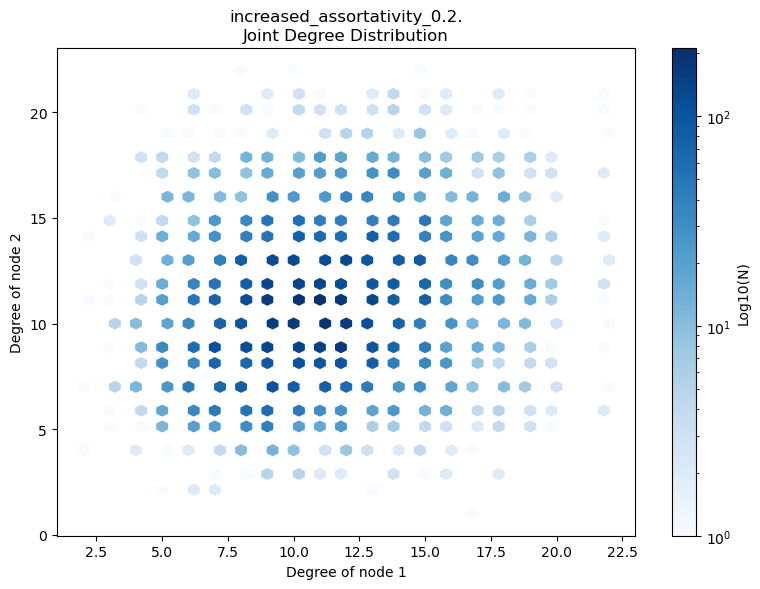

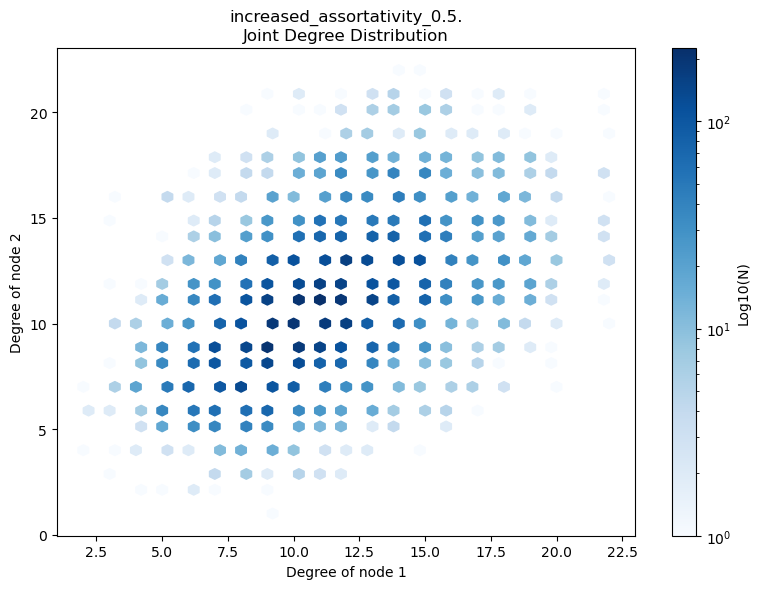

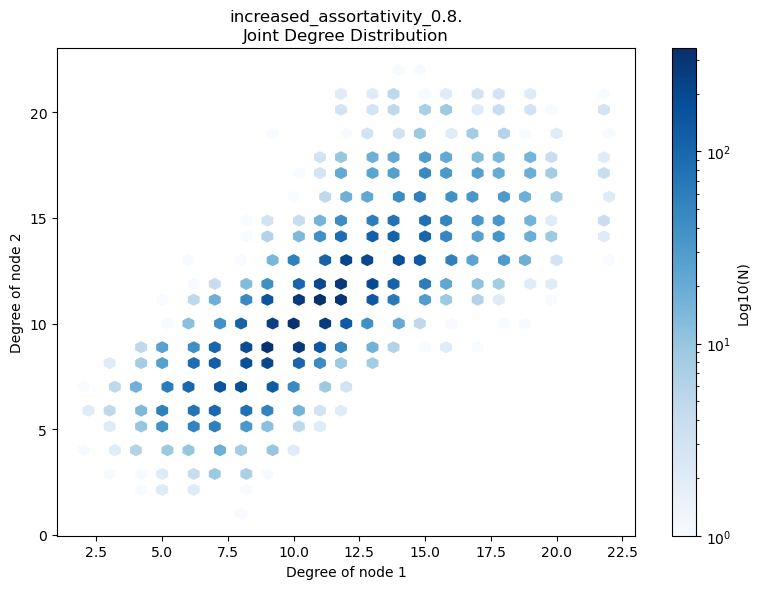

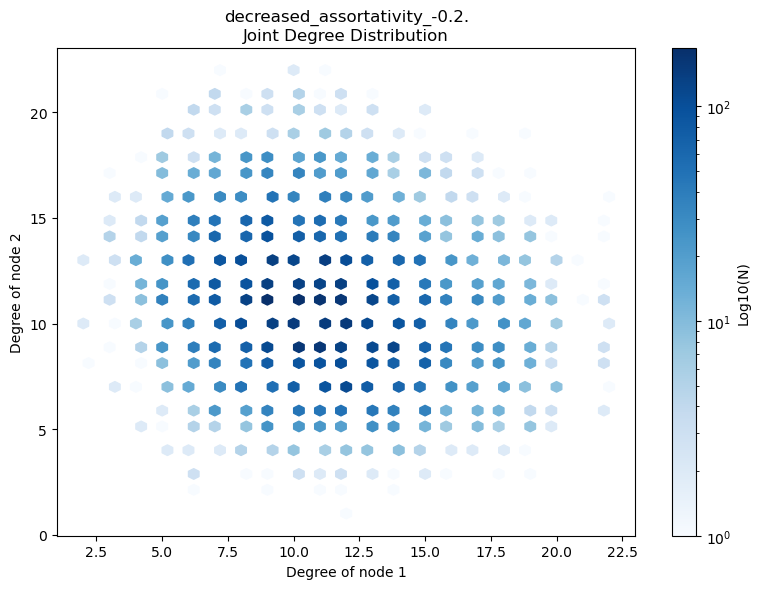

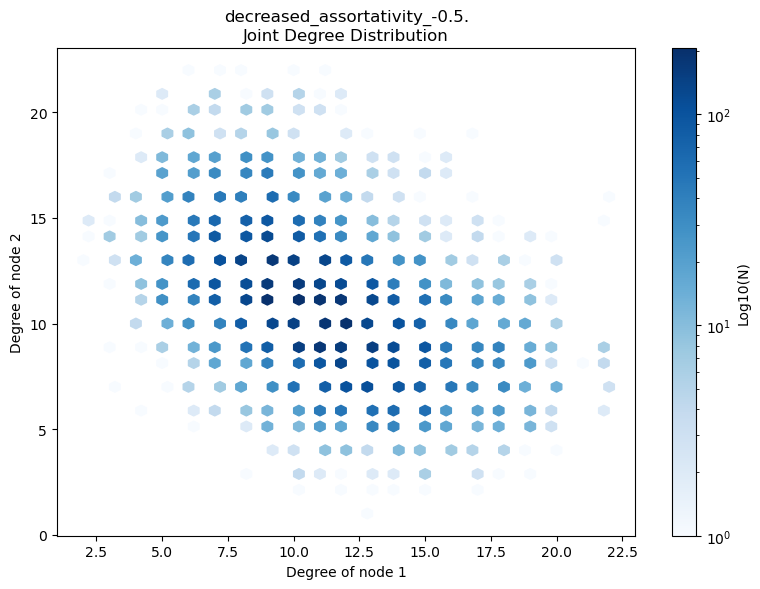

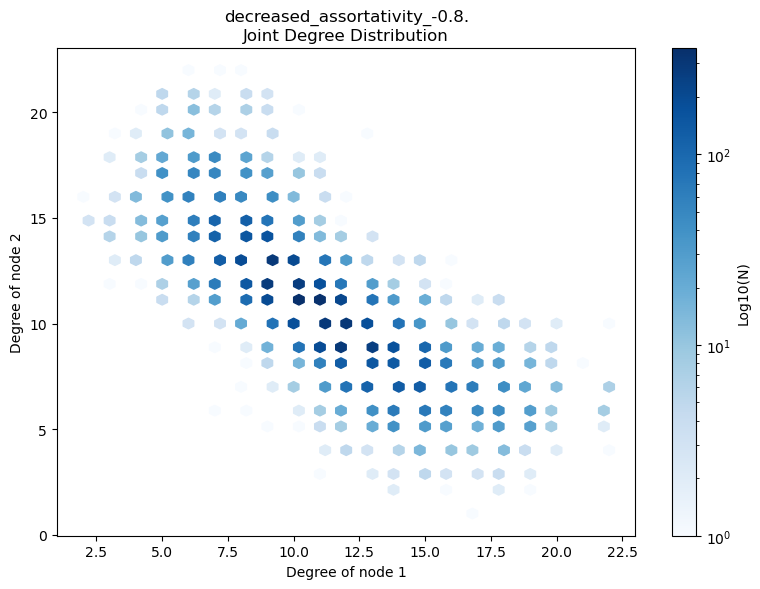

In [30]:
# 使用示例
filenames = [
    "increased_assortativity_0.2.mat",
    "increased_assortativity_0.5.mat",
    "increased_assortativity_0.8.mat",
    "decreased_assortativity_-0.2.mat",
    "decreased_assortativity_-0.5.mat",
    "decreased_assortativity_-0.8.mat"
]
        
for filename in filenames:
    # 读取MAT文件中的邻接矩阵
    mat = scipy.io.loadmat(filename)
    adj_matrix = mat['adj_matrix']
    # 将邻接矩阵转换为NetworkX图对象
    G = nx.from_numpy_array(adj_matrix)
    # 使用正则表达式提取正确的标题
    match = re.match(r"(increased_assortativity_[-\d.]+)|(decreased_assortativity_[-\d.]+)", filename)
    if match:
        title = match.group(0)
    else:
        title = "Unknown Title"
    # 绘制联合度分布图
    draw_joint_degree_distribution(G, title)

In [50]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.io

def draw_joint_degree_distribution(G, title):
    """
    绘制联合度分布图来体现网络的度相关性。
    """
    # 获取网络的所有边
    edges = np.array(G.edges())
    # 获取每个节点的度
    degrees = dict(G.degree())
    
    # 获取每条边两端节点的度
    edge_degrees = np.vectorize(degrees.get)(edges)
    
    # 绘制散点图
    plt.figure(figsize=(8, 6))
    plt.hexbin(edge_degrees[:, 0], edge_degrees[:, 1], gridsize=50, cmap='Blues')
    plt.colorbar(label='N')
    plt.xlabel('Degree of node 1')
    plt.ylabel('Degree of node 2')
    plt.title(f'{title}\nJoint Degree Distribution')
    plt.tight_layout()
    plt.show()

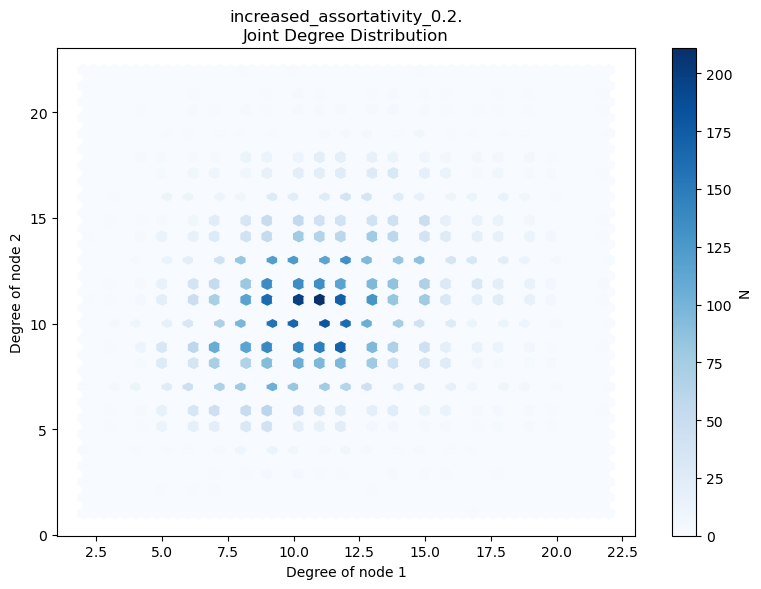

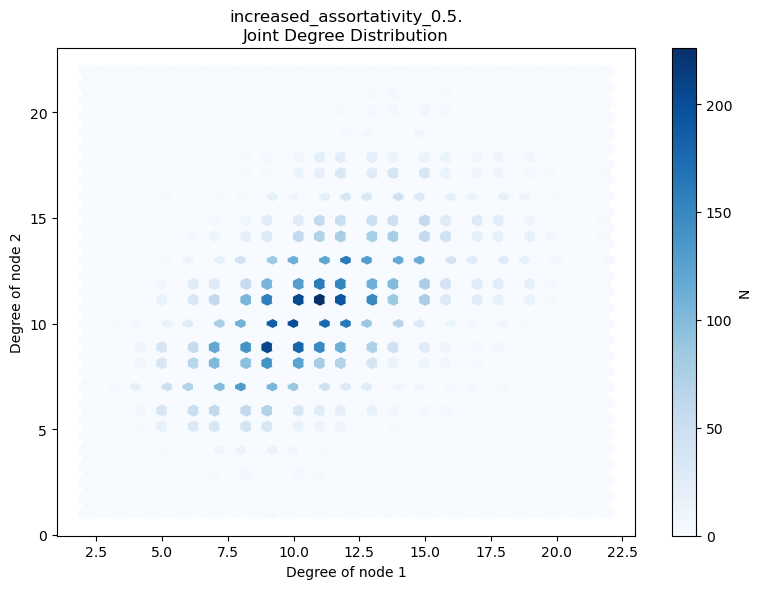

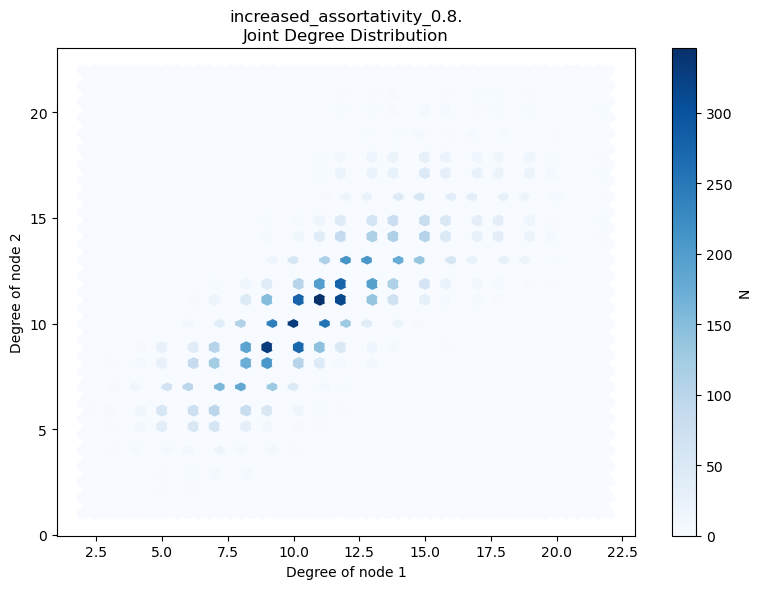

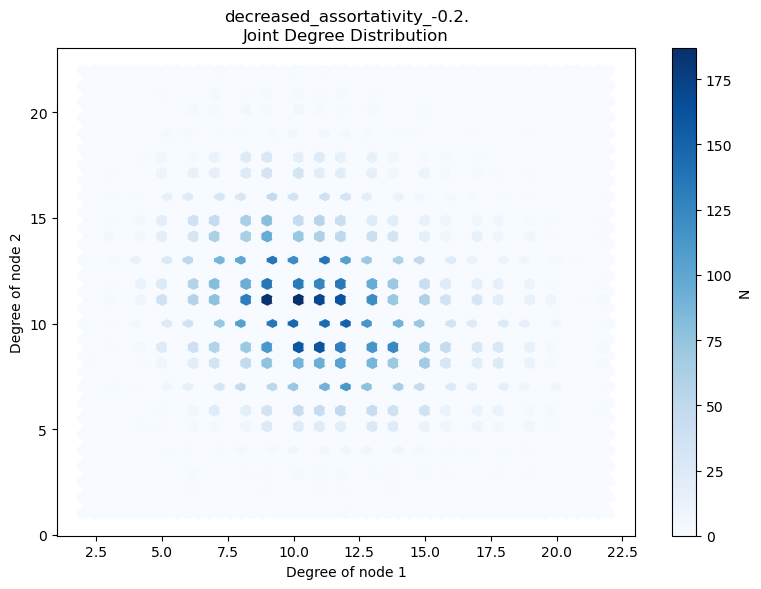

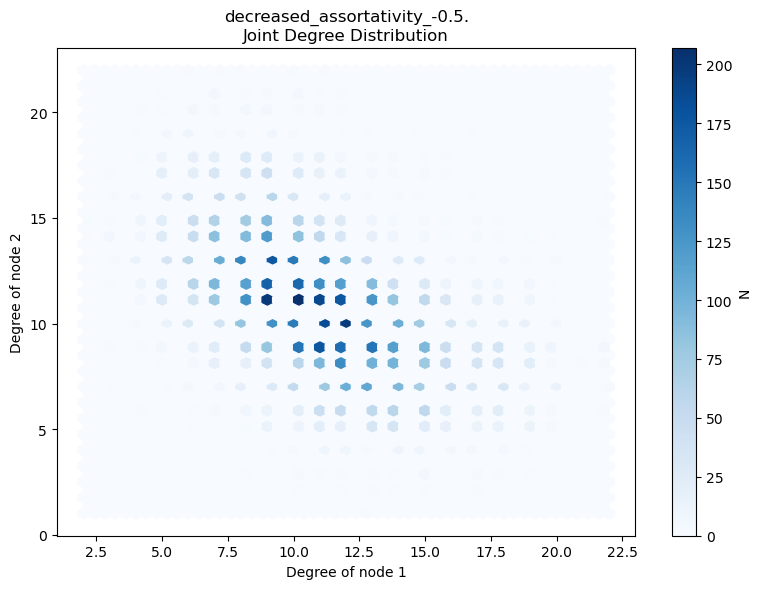

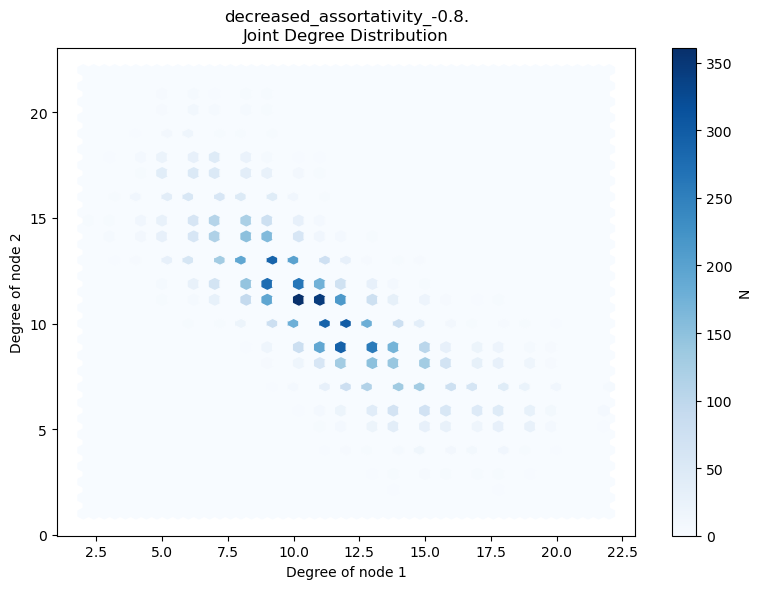

In [51]:
# 使用示例
filenames = [
    "increased_assortativity_0.2.mat",
    "increased_assortativity_0.5.mat",
    "increased_assortativity_0.8.mat",
    "decreased_assortativity_-0.2.mat",
    "decreased_assortativity_-0.5.mat",
    "decreased_assortativity_-0.8.mat"
]
        
for filename in filenames:
    # 读取MAT文件中的邻接矩阵
    mat = scipy.io.loadmat(filename)
    adj_matrix = mat['adj_matrix']
    # 将邻接矩阵转换为NetworkX图对象
    G = nx.from_numpy_array(adj_matrix)
    # 使用正则表达式提取正确的标题
    match = re.match(r"(increased_assortativity_[-\d.]+)|(decreased_assortativity_[-\d.]+)", filename)
    if match:
        title = match.group(0)
    else:
        title = "Unknown Title"
    # 绘制联合度分布图
    draw_joint_degree_distribution(G, title)

In [46]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.io
import re

def get_global_count_range(filenames):
    """计算所有文件中的全局最大和最小计数值"""
    max_count = 0
    # 遍历所有文件计算最大计数值
    for filename in filenames:
        mat = scipy.io.loadmat(filename)
        adj_matrix = mat['adj_matrix']
        G = nx.from_numpy_array(adj_matrix)
        degrees = dict(G.degree())
        edges = np.array(G.edges())
        edge_degrees = np.vectorize(degrees.get)(edges)
        # 使用numpy的直方图函数计算边计数分布
        counts, _ = np.histogramdd(edge_degrees, bins=[50, 50])
        max_count = max(max_count, counts.max())
    return max_count

def draw_joint_degree_distribution(G, title, vmax):
    """绘制联合度分布图并统一颜色深浅代表的值"""
    degrees = dict(G.degree())
    edges = np.array(G.edges())
    edge_degrees = np.vectorize(degrees.get)(edges)
    plt.figure(figsize=(8, 6))
    plt.hexbin(edge_degrees[:, 0], edge_degrees[:, 1], gridsize=50, cmap='Blues', bins='log', vmax=vmax)
    plt.colorbar(label='Log10(N)')
    plt.xlabel('Degree of node 1')
    plt.ylabel('Degree of node 2')
    plt.title(f'{title}\nJoint Degree Distribution')
    plt.tight_layout()
    plt.show()

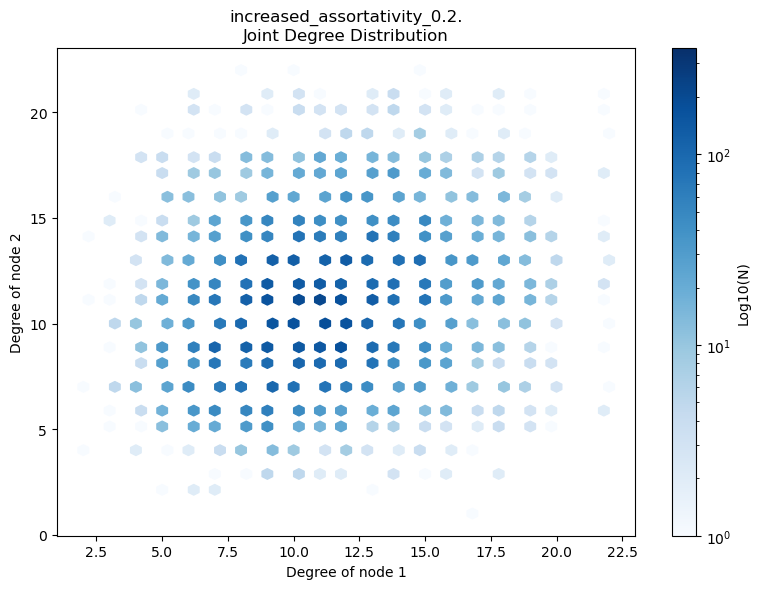

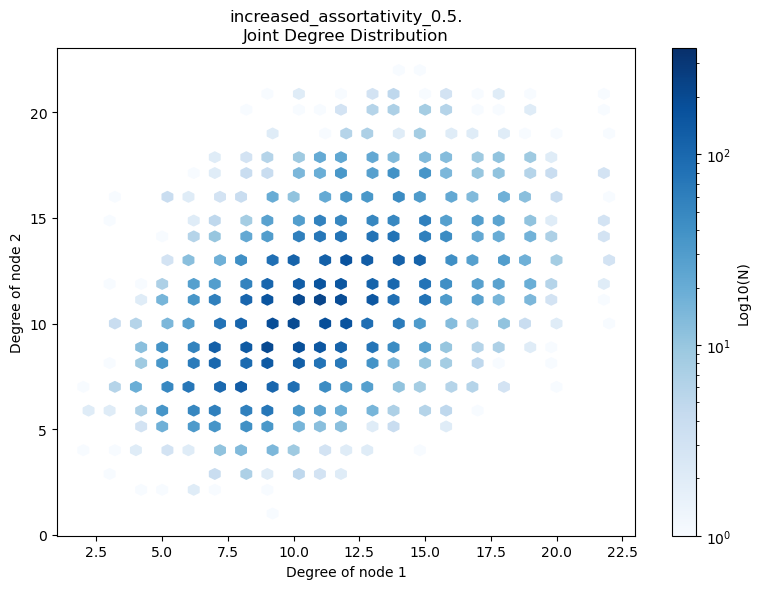

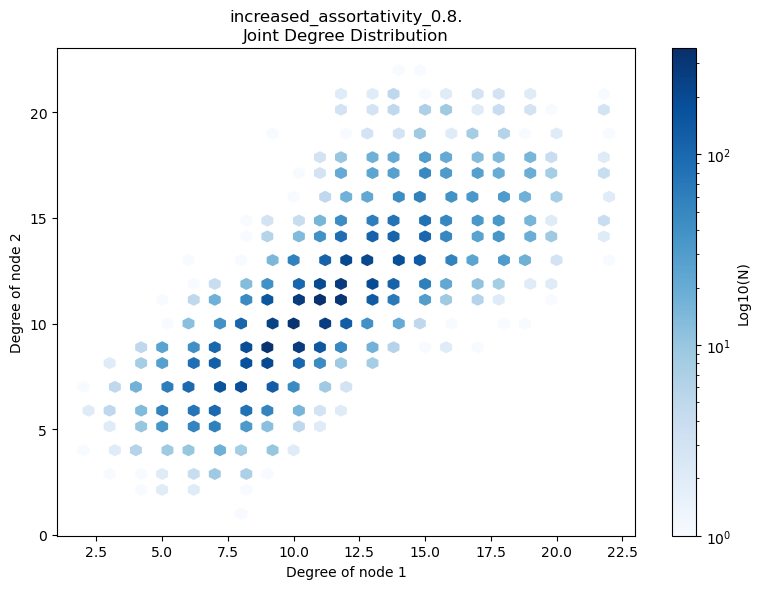

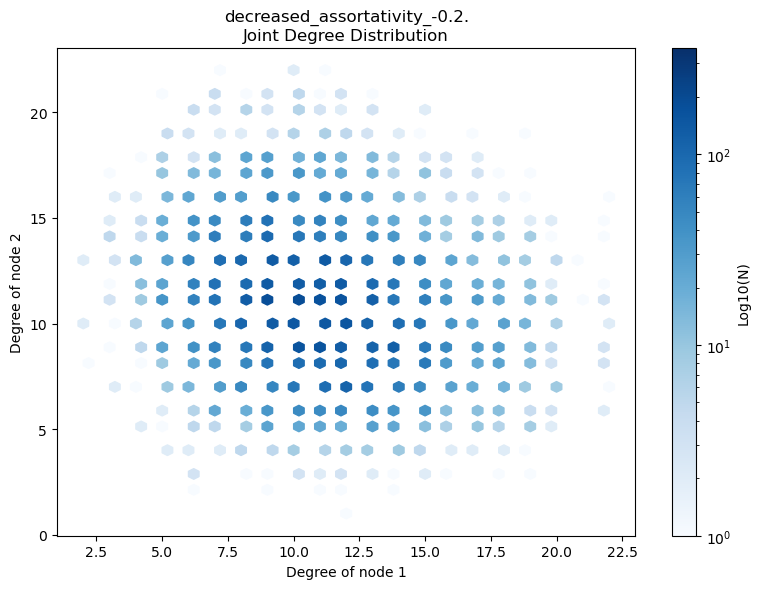

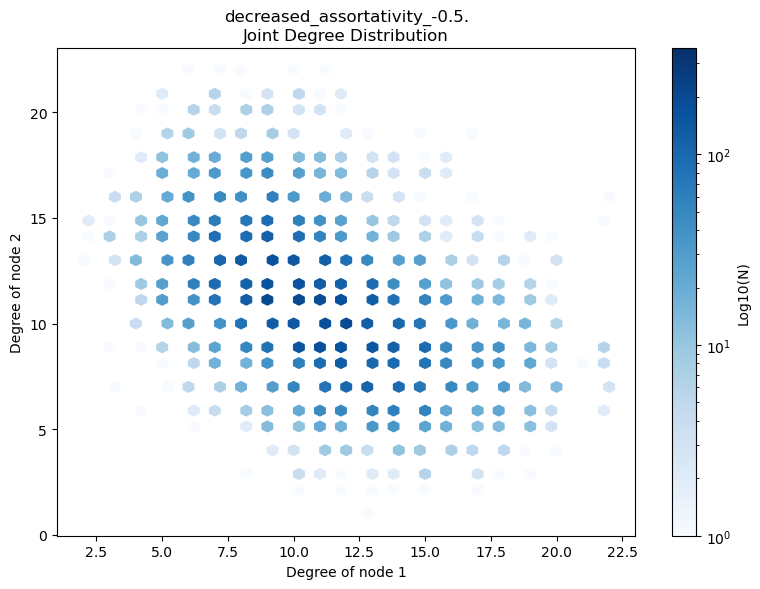

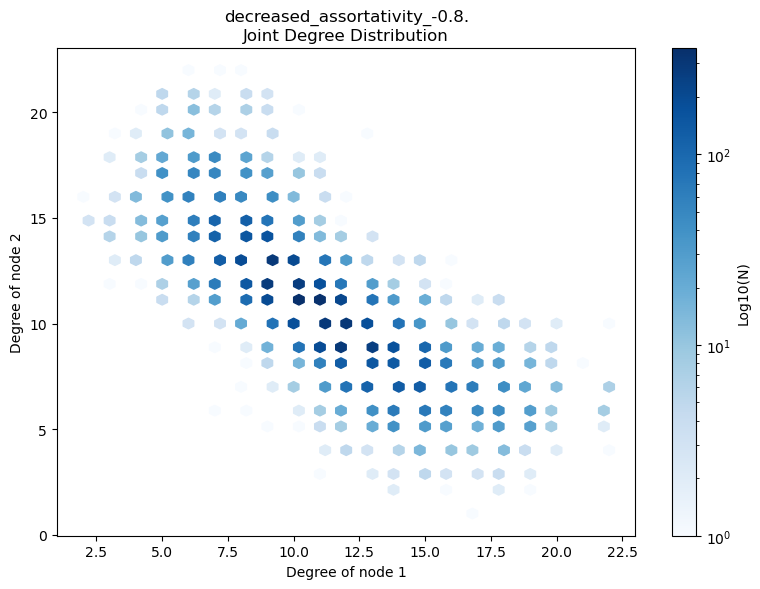

In [47]:
# 获取全局最大计数值
filenames = [
    "increased_assortativity_0.2.mat",
    "increased_assortativity_0.5.mat",
    "increased_assortativity_0.8.mat",
    "decreased_assortativity_-0.2.mat",
    "decreased_assortativity_-0.5.mat",
    "decreased_assortativity_-0.8.mat"
]
vmax = get_global_count_range(filenames)

# 使用统一的颜色深浅范围绘制热图
for filename in filenames:
    mat = scipy.io.loadmat(filename)
    adj_matrix = mat['adj_matrix']
    G = nx.from_numpy_array(adj_matrix)
    match = re.match(r"(increased_assortativity_[-\d.]+)|(decreased_assortativity_[-\d.]+)", filename)
    title = match.group(0) if match else "Unknown Title"
    draw_joint_degree_distribution(G, title, vmax)

In [52]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.io
import re

def get_global_count_range(filenames):
    """计算所有文件中的全局最大和最小计数值"""
    max_count = 0
    # 遍历所有文件计算最大计数值
    for filename in filenames:
        mat = scipy.io.loadmat(filename)
        adj_matrix = mat['adj_matrix']
        G = nx.from_numpy_array(adj_matrix)
        degrees = dict(G.degree())
        edges = np.array(G.edges())
        edge_degrees = np.vectorize(degrees.get)(edges)
        # 使用numpy的直方图函数计算边计数分布
        counts, _ = np.histogramdd(edge_degrees, bins=[50, 50])
        max_count = max(max_count, counts.max())
    return max_count

def draw_joint_degree_distribution(G, title, vmax):
    """绘制联合度分布图并统一颜色深浅代表的值"""
    degrees = dict(G.degree())
    edges = np.array(G.edges())
    edge_degrees = np.vectorize(degrees.get)(edges)
    plt.figure(figsize=(8, 6))
    plt.hexbin(edge_degrees[:, 0], edge_degrees[:, 1], gridsize=50, cmap='Blues', vmax=vmax)
    plt.colorbar(label='N')
    plt.xlabel('Degree of node 1')
    plt.ylabel('Degree of node 2')
    plt.title(f'{title}\nJoint Degree Distribution')
    plt.tight_layout()
    plt.show()

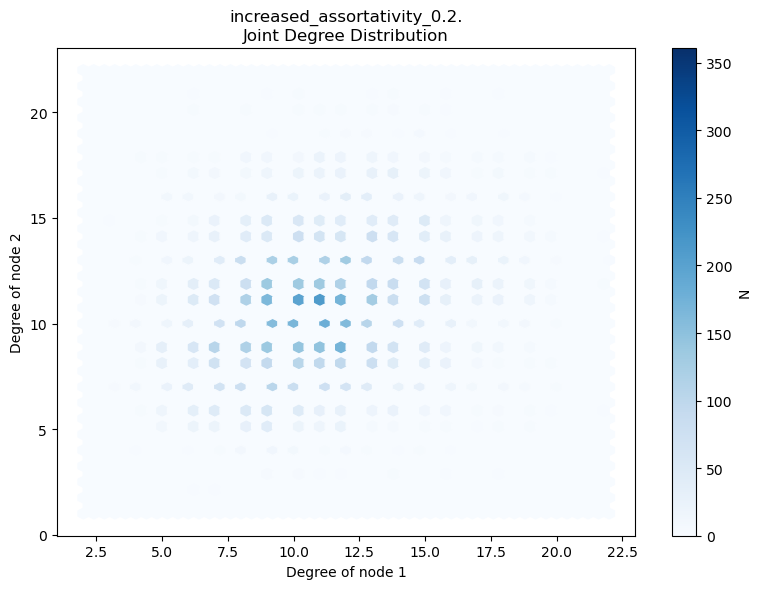

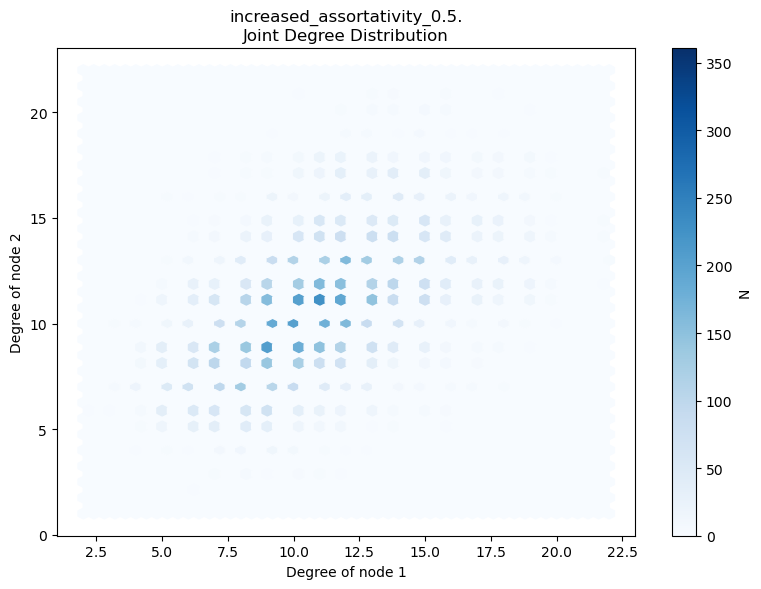

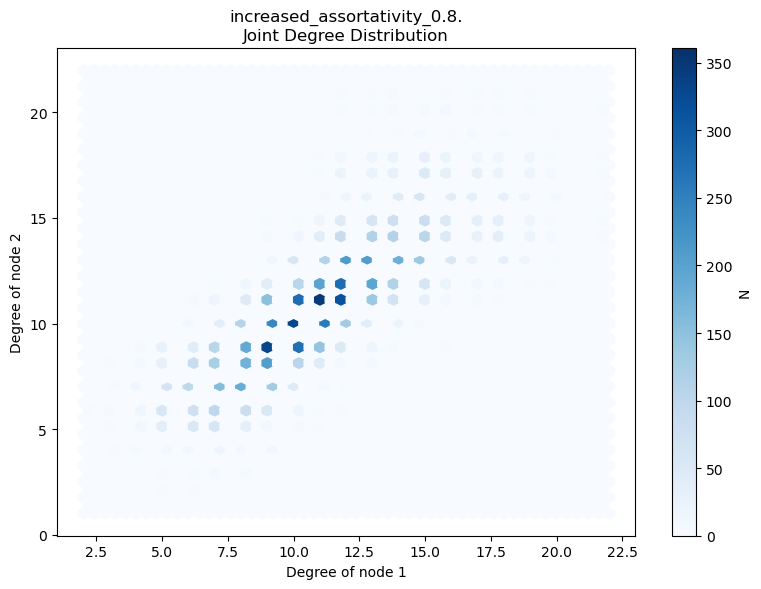

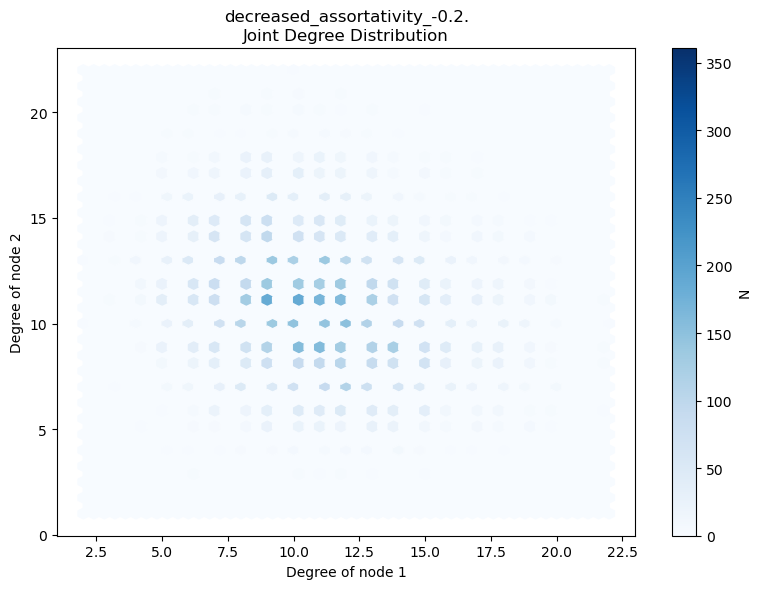

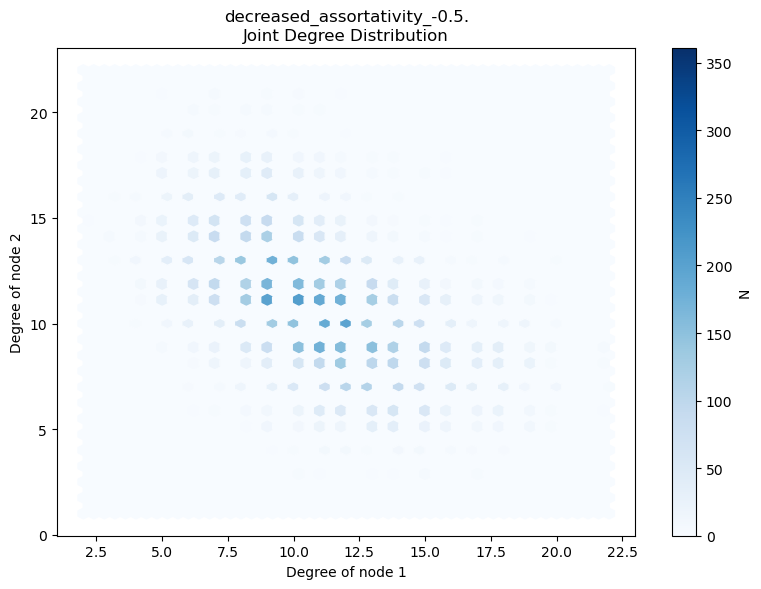

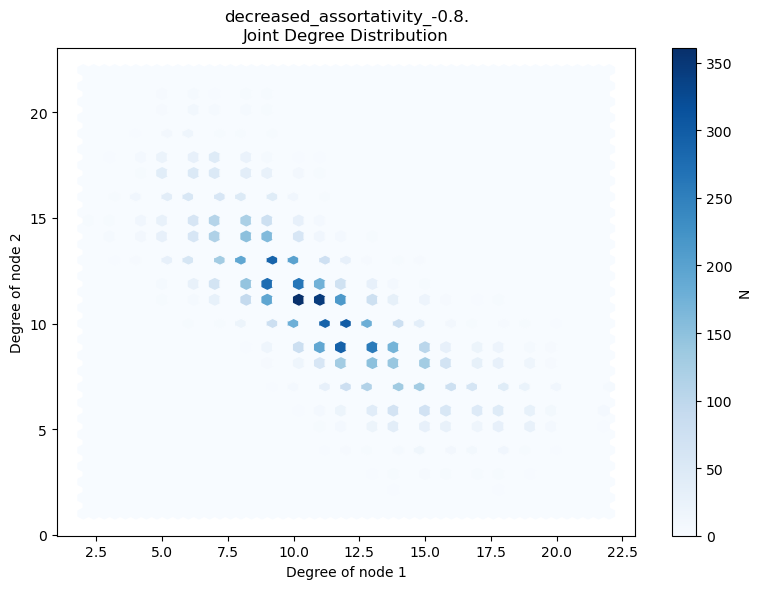

In [53]:
# 获取全局最大计数值
filenames = [
    "increased_assortativity_0.2.mat",
    "increased_assortativity_0.5.mat",
    "increased_assortativity_0.8.mat",
    "decreased_assortativity_-0.2.mat",
    "decreased_assortativity_-0.5.mat",
    "decreased_assortativity_-0.8.mat"
]
vmax = get_global_count_range(filenames)

# 使用统一的颜色深浅范围绘制热图
for filename in filenames:
    mat = scipy.io.loadmat(filename)
    adj_matrix = mat['adj_matrix']
    G = nx.from_numpy_array(adj_matrix)
    match = re.match(r"(increased_assortativity_[-\d.]+)|(decreased_assortativity_[-\d.]+)", filename)
    title = match.group(0) if match else "Unknown Title"
    draw_joint_degree_distribution(G, title, vmax)

<Figure size 640x480 with 0 Axes>

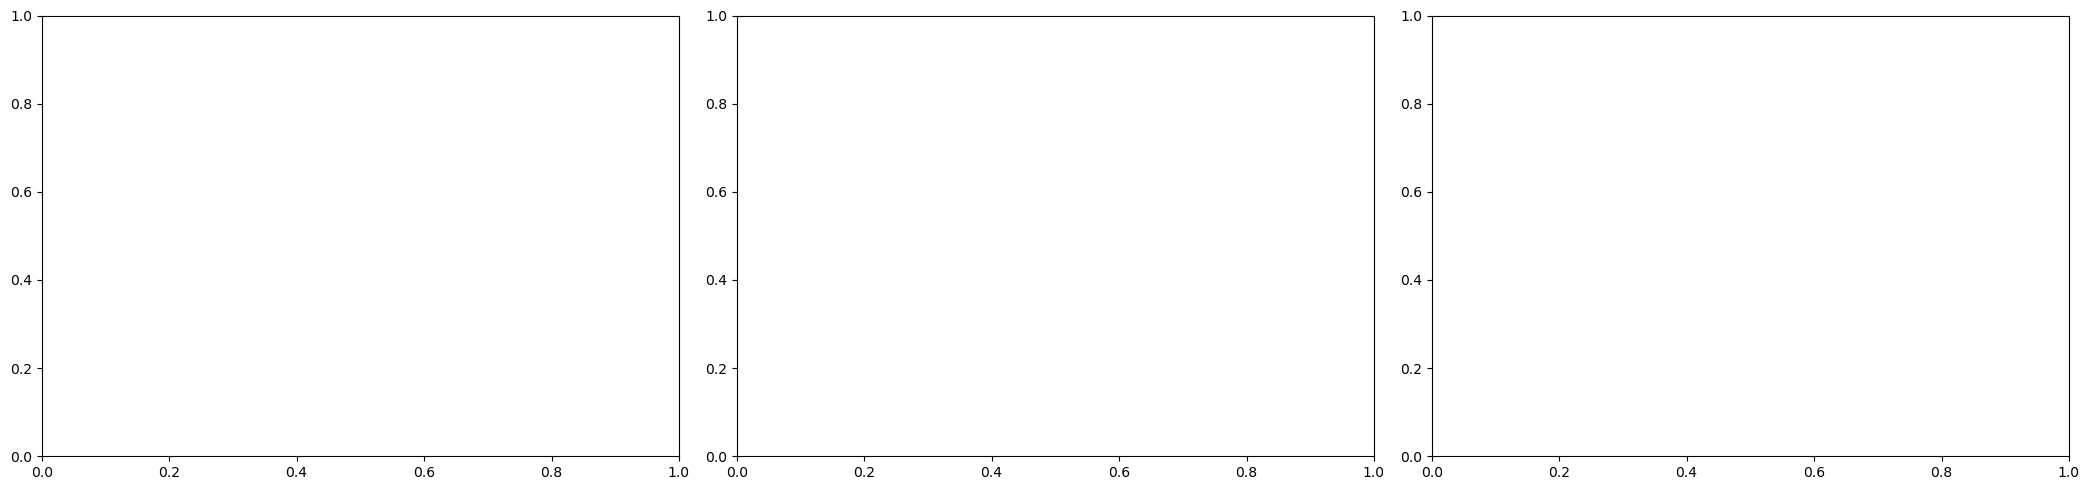

In [43]:
def draw_joint_degree_distribution(G, ax, title):
    degrees = dict(G.degree())
    edge_degrees = np.vectorize(degrees.get)(np.array(G.edges()))
    # 使用hexbin绘制密度图，并返回hexbin对象供后续使用
    hexbin = ax.hexbin(edge_degrees[:, 0], edge_degrees[:, 1], gridsize=50, cmap='Blues', bins='log')
    ax.set_xlabel('Degree of node 1')
    ax.set_ylabel('Degree of node 2')
    ax.set_title(title)
    return hexbin  # 返回hexbin对象

# 然后在主循环中，接收这个返回值，并在每行图的最后添加颜色条
last_hexbin = None  # 初始化变量来存储最后一个hexbin对象
for i, filename in enumerate(filenames):
    # 省略加载数据和设置图表部分...
    hexbin = draw_joint_degree_distribution(G, ax, title)  # 接收返回的hexbin对象
    if (i + 1) % 3 == 0 or i == len(filenames) - 1:
        last_hexbin = hexbin  # 更新最后一个hexbin对象
    # 当完成一行或处理完所有文件时，为最后一个hexbin添加颜色条
    if (i + 1) % 3 == 0 or i == len(filenames) - 1:
        plt.colorbar(last_hexbin, ax=ax, label='Log10(N)')
        plt.tight_layout()
        plt.show()
        if i != len(filenames) - 1:
            fig, axes = plt.subplots(1, 3, figsize=(21, 5))
            axes = axes.flatten()

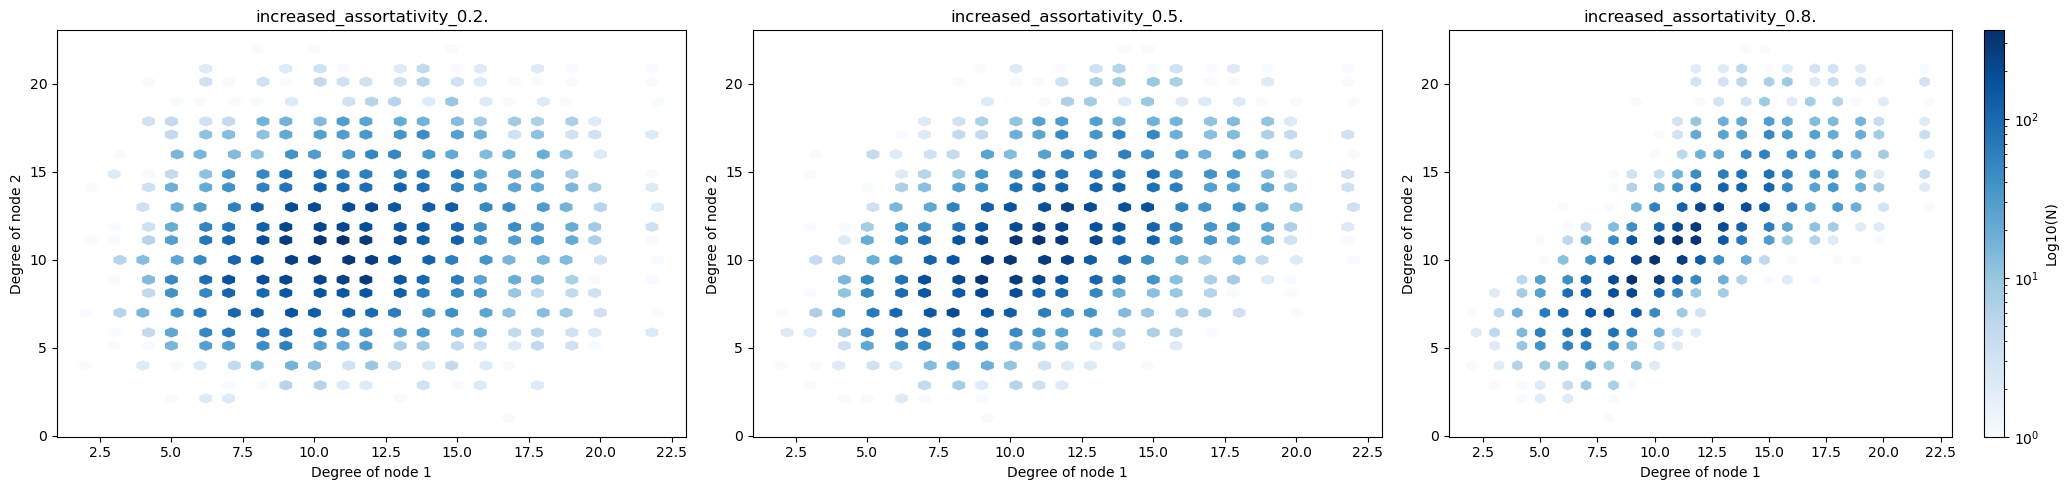

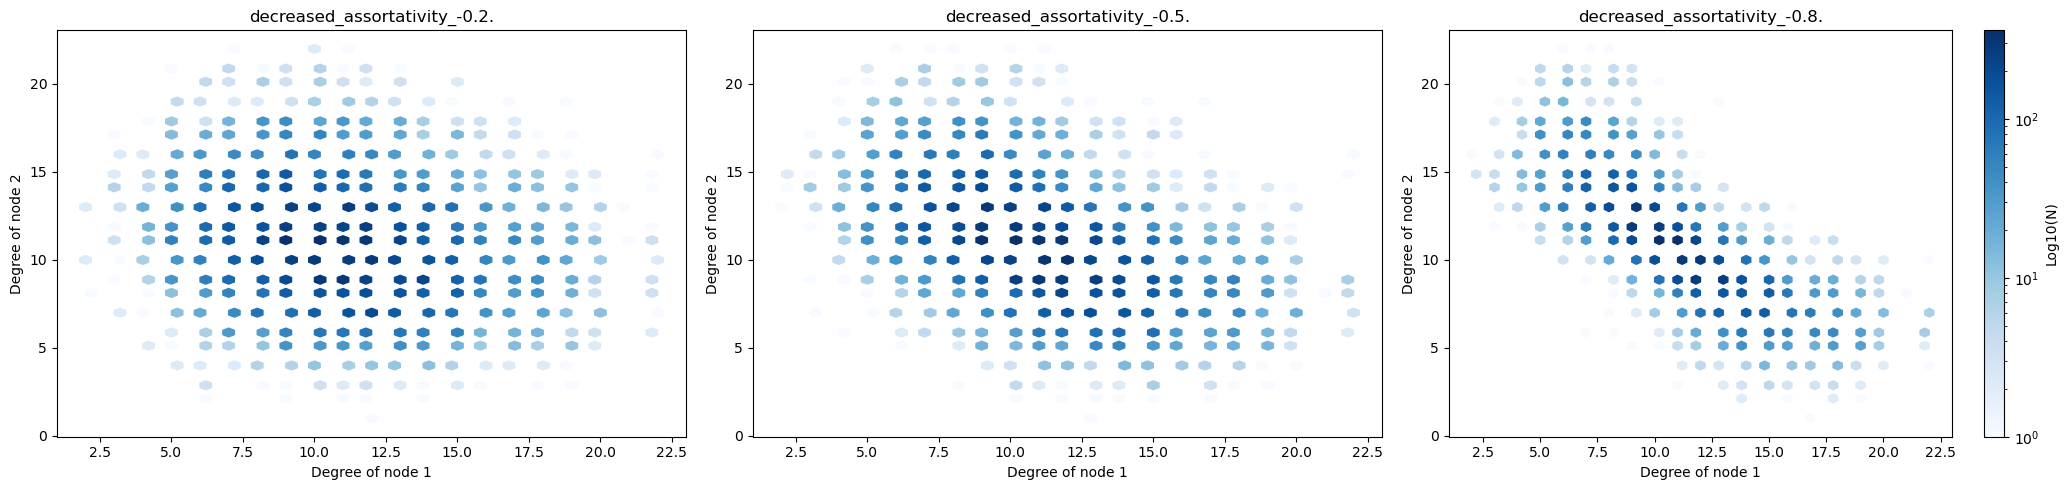

In [38]:
# 设置一行画三个图
fig, axes = plt.subplots(1, 3, figsize=(21, 5))
axes = axes.flatten()  # 如果你有一个二维axes数组，可以使用flatten

filenames = [
    "increased_assortativity_0.2.mat",
    "increased_assortativity_0.5.mat",
    "increased_assortativity_0.8.mat",
    "decreased_assortativity_-0.2.mat",
    "decreased_assortativity_-0.5.mat",
    "decreased_assortativity_-0.8.mat"
]

for i, filename in enumerate(filenames):
    mat = scipy.io.loadmat(filename)
    adj_matrix = mat['adj_matrix']
    G = nx.from_numpy_array(adj_matrix)
    match = re.match(r"(increased_assortativity_[-\d.]+)|(decreased_assortativity_[-\d.]+)", filename)
    title = match.group(0) if match else "Unknown Title"
    
    # 根据索引选择对应的子图
    ax = axes[i % 3]
    draw_joint_degree_distribution(G, ax, title)
    
    # 如果达到每行的图的数量，显示并清除当前图形，为下一行做准备
    if (i + 1) % 3 == 0 or i == len(filenames) - 1:
        plt.colorbar(hexbin, ax=axes[i % 3], label='Log10(N)')
        plt.tight_layout()
        plt.show()
        if i != len(filenames) - 1:
            fig, axes = plt.subplots(1, 3, figsize=(21, 5))
            axes = axes.flatten()

<Figure size 640x480 with 0 Axes>

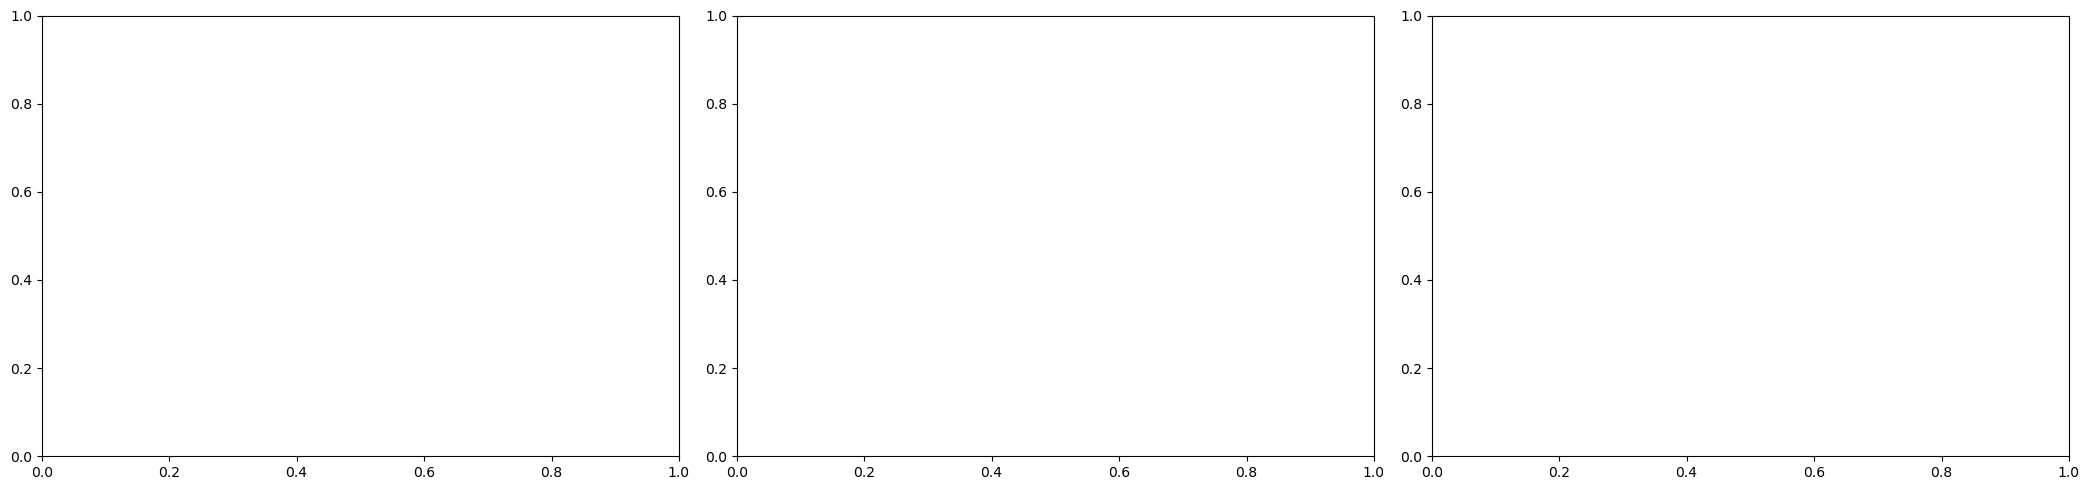

In [54]:
def draw_joint_degree_distribution(G, ax, title):
    degrees = dict(G.degree())
    edge_degrees = np.vectorize(degrees.get)(np.array(G.edges()))
    # 使用hexbin绘制密度图，并返回hexbin对象供后续使用
    hexbin = ax.hexbin(edge_degrees[:, 0], edge_degrees[:, 1], gridsize=50, cmap='Blues')
    ax.set_xlabel('Degree of node 1')
    ax.set_ylabel('Degree of node 2')
    ax.set_title(title)
    return hexbin  # 返回hexbin对象

# 然后在主循环中，接收这个返回值，并在每行图的最后添加颜色条
last_hexbin = None  # 初始化变量来存储最后一个hexbin对象
for i, filename in enumerate(filenames):
    # 省略加载数据和设置图表部分...
    hexbin = draw_joint_degree_distribution(G, ax, title)  # 接收返回的hexbin对象
    if (i + 1) % 3 == 0 or i == len(filenames) - 1:
        last_hexbin = hexbin  # 更新最后一个hexbin对象
    # 当完成一行或处理完所有文件时，为最后一个hexbin添加颜色条
    if (i + 1) % 3 == 0 or i == len(filenames) - 1:
        plt.colorbar(last_hexbin, ax=ax, label='Log10(N)')
        plt.tight_layout()
        plt.show()
        if i != len(filenames) - 1:
            fig, axes = plt.subplots(1, 3, figsize=(21, 5))
            axes = axes.flatten()

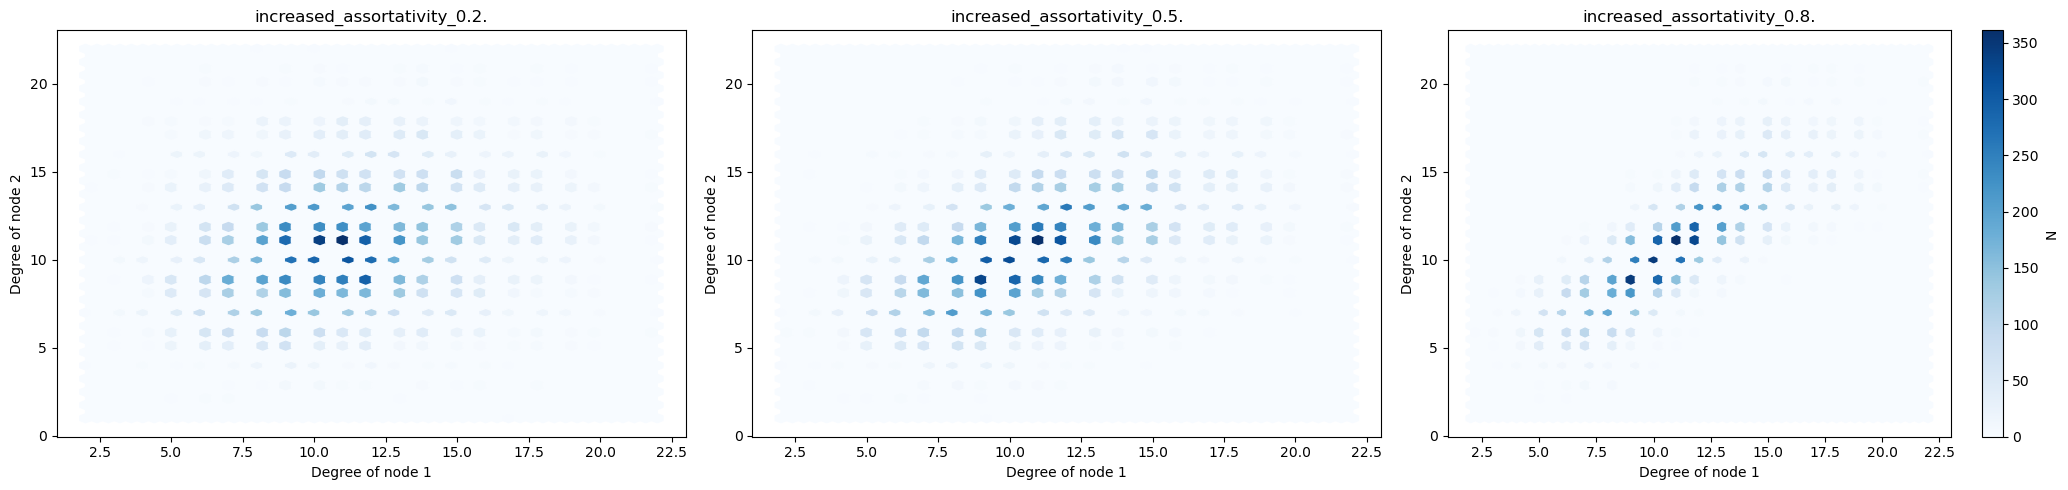

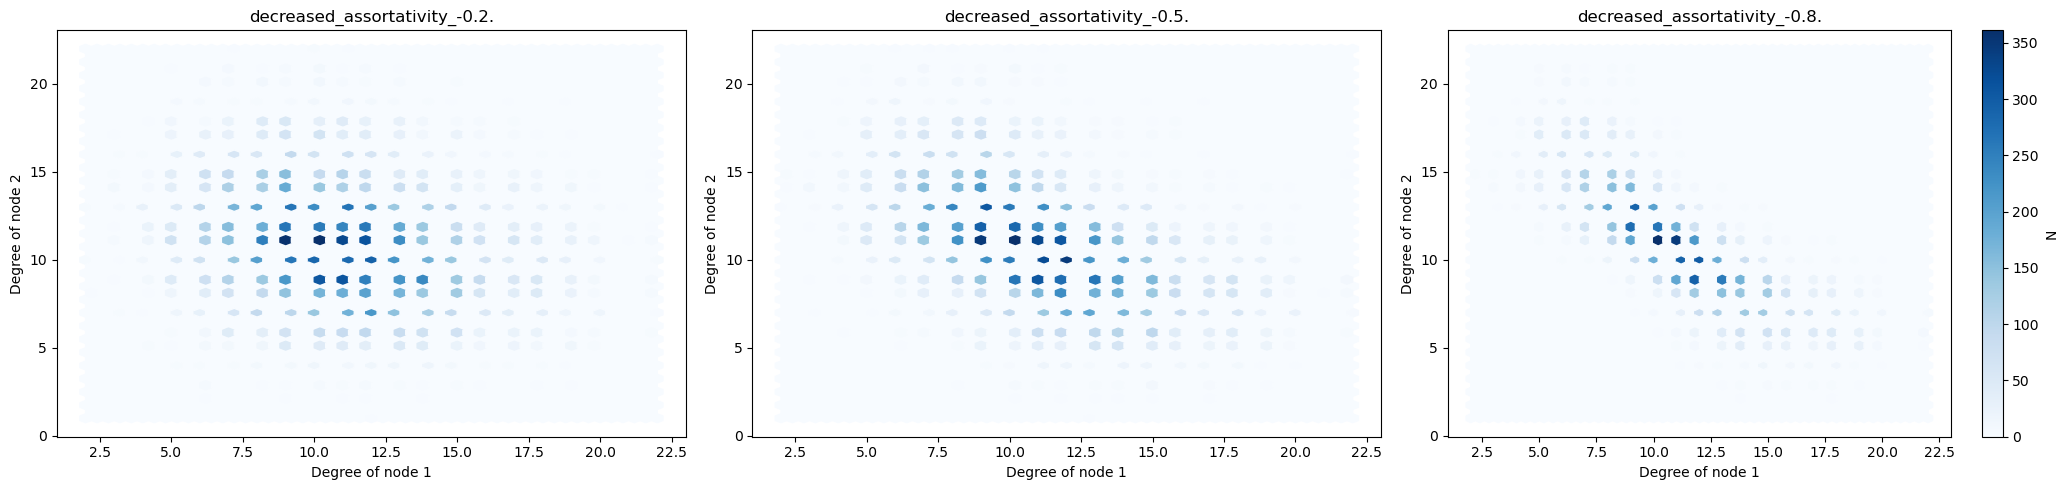

In [55]:
# 设置一行画三个图
fig, axes = plt.subplots(1, 3, figsize=(21, 5))
axes = axes.flatten()  # 如果你有一个二维axes数组，可以使用flatten

filenames = [
    "increased_assortativity_0.2.mat",
    "increased_assortativity_0.5.mat",
    "increased_assortativity_0.8.mat",
    "decreased_assortativity_-0.2.mat",
    "decreased_assortativity_-0.5.mat",
    "decreased_assortativity_-0.8.mat"
]

for i, filename in enumerate(filenames):
    mat = scipy.io.loadmat(filename)
    adj_matrix = mat['adj_matrix']
    G = nx.from_numpy_array(adj_matrix)
    match = re.match(r"(increased_assortativity_[-\d.]+)|(decreased_assortativity_[-\d.]+)", filename)
    title = match.group(0) if match else "Unknown Title"
    
    # 根据索引选择对应的子图
    ax = axes[i % 3]
    draw_joint_degree_distribution(G, ax, title)
    
    # 如果达到每行的图的数量，显示并清除当前图形，为下一行做准备
    if (i + 1) % 3 == 0 or i == len(filenames) - 1:
        plt.colorbar(hexbin, ax=axes[i % 3], label='N')
        plt.tight_layout()
        plt.show()
        if i != len(filenames) - 1:
            fig, axes = plt.subplots(1, 3, figsize=(21, 5))
            axes = axes.flatten()